# 케라스를 이용한 CNN 구현

케라스 패키지의 layers 서브패키지에서 제공하는 `Conv2D` 클래스를 이용하면 쉽게 CNN을 구현할 수 있다.

In [1]:
from tensorflow.keras.layers import Conv2D

생성자 함수에서 볼 수 있듯이 `Conv2D` 클래스는 다양한 생성자 인수를 가진다.

```
Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
```

이 중 자주 사용하는 인수에 대해 설명한다.

#### `filters` 인수

`filters` 인수는 정수로 사용할 커널의 개수를 지정한다. 문제의 복잡도에 따라 달라지며 문제가 복잡할수록 더 많은 개수의 커널이 필요하다.  

#### `kernel_size` 인수

`kernel_size` 인수는 (정수, 정수) 튜플로 사용할 커널의 크기를 지정한다. 뒤에서 설명할 패딩방식의 문제로 홀수 크기가 사용된다. 일반적으로 (1,1), (3,3), (5,5), (7,7) 등의 크기가 많이 쓰인다. (7,7) 이상의 크기는 거의 사용되지 않는다. 

#### `strides` 인수

`strides` 인수는 (정수, 정수) 커널이 움직이는 방식을 결정한다. 디폴트값은 (1,1)로 이 상태에서는 커널이 좌우로 1픽셀, 상하로 1픽셀씩 움직인다. 대부분의 경우에는 이 값을 그대로 사용한다. 만약 (2,2)로 지정하면 커널이 좌우로 2픽셀, 상하로 2픽셀씩 움직이므로 출력되는 이미지의 크기가 절반으로 줄어든다. 최대값 풀링 대신 이를 사용하는 경우도 있다.

#### `padding` 인수

`padding` 인수는 출력크기를 조절하는 인수로 `"valid"` 또는 `"same"`이라는 문자열을 받는다. 디폴트값은 `"valid"`다. `"valid"` 문자열을 넣으면 동일크기 패딩(same-size padding)을 하지 않으므로 출력 이미지의 크기가 입력 이미지의 크기보자 작아진다. `"same"` 문자열을 넣으면 동일크기 패딩을 하므로 출력 이미지의 크기가 입력 이미지의 크기와 같아진다. 

#### `data_format` 인수

`data_format` 인수는 입력 형식를 설정하는 인수로 `"channels_last"` 또는 `"channels_first"`이라는 문자열을 받는다. 디폴트값은 `"channels_last"`다. `"channels_last"` 문자열을 넣으면 입력 데이터 텐서의 형식이 (배치 크기, 높이, 폭, 채널수)라고 가정한다. `"channels_first"` 문자열을 넣으면 입력 데이터 텐서의 형식이 (배치 크기, 채널수, 높이, 폭)라고 가정한다. 

#### `dilation_rate` 인수

`dilation_rate` 인수는 dilated 컨볼루션을 하는 경우 dilation 비율을 결정하는 값이다. dilated 컨볼루션이란 입력 이미지의 모든 값을 사용하는 이미지 필터링이 아니라 dilation 비율만큼 샘플링한 일부 데이터만 사용하여 컨볼루션하는 것이다.

### 단층 CNN을 사용한 MNIST 예측

우선 하나의 컨볼루션 레이어만 가지는 CNN을 사용하여 MNIST 예측 문제를 풀어보자.

우선 다음과 같이 MNIST 데이터를 받는다.

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
X_train = X_train0[:, :, :, np.newaxis].astype('float32') / 255.0
X_test = X_test0[:, :, :, np.newaxis].astype('float32') / 255.0
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)

입력 데이터는 28x28 크기의 흑백 이미지 60000장이다.

In [3]:
X_train.shape

(60000, 28, 28, 1)

케라스를 사용하여 `Conv2D` 레이어를 포함하는 시퀀셜 모형을 만든다. 사용한 `Conv2D` 레이어의 파라미터는 다음과 같다.

* `filters=4`: 4개의 커널 사용
* `kernel_size=(5,5)`: 5x5 크기의 커널 사용
* `activation="relu"`: ReLU 활성화함수 사용

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model1 = Sequential()
model1.add(Conv2D(4, (3, 3), input_shape=(28, 28, 1), activation='relu', 
                  kernel_initializer="glorot_uniform"))
model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dense(10, activation='softmax',
                 kernel_initializer="glorot_uniform"))

np.random.seed(0)
model1.compile(loss='categorical_crossentropy', 
               metrics=['accuracy'], optimizer=Adam())

In [5]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 4)         0         
_________________________________________________________________
flatten (Flatten)            (None, 676)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                6770      
Total params: 6,810
Trainable params: 6,810
Non-trainable params: 0
_________________________________________________________________


In [6]:
%%time
hist1 = model1.fit(X_train, Y_train, epochs=10, batch_size=600,
                   validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 4s - loss: 1.1672 - accuracy: 0.7133 - val_loss: 0.4976 - val_accuracy: 0.8735
Epoch 2/10
60000/60000 - 3s - loss: 0.4203 - accuracy: 0.8840 - val_loss: 0.3451 - val_accuracy: 0.9043
Epoch 3/10
60000/60000 - 3s - loss: 0.3405 - accuracy: 0.9024 - val_loss: 0.3052 - val_accuracy: 0.9131
Epoch 4/10
60000/60000 - 3s - loss: 0.3123 - accuracy: 0.9093 - val_loss: 0.2908 - val_accuracy: 0.9166
Epoch 5/10
60000/60000 - 3s - loss: 0.2967 - accuracy: 0.9130 - val_loss: 0.2775 - val_accuracy: 0.9199
Epoch 6/10
60000/60000 - 3s - loss: 0.2853 - accuracy: 0.9175 - val_loss: 0.2670 - val_accuracy: 0.9221
Epoch 7/10
60000/60000 - 3s - loss: 0.2758 - accuracy: 0.9196 - val_loss: 0.2606 - val_accuracy: 0.9241
Epoch 8/10
60000/60000 - 3s - loss: 0.2684 - accuracy: 0.9226 - val_loss: 0.2563 - val_accuracy: 0.9240
Epoch 9/10
60000/60000 - 3s - loss: 0.2618 - accuracy: 0.9240 - val_loss: 0.2485 - val_accuracy: 0.9267
Epoch 10/10
60

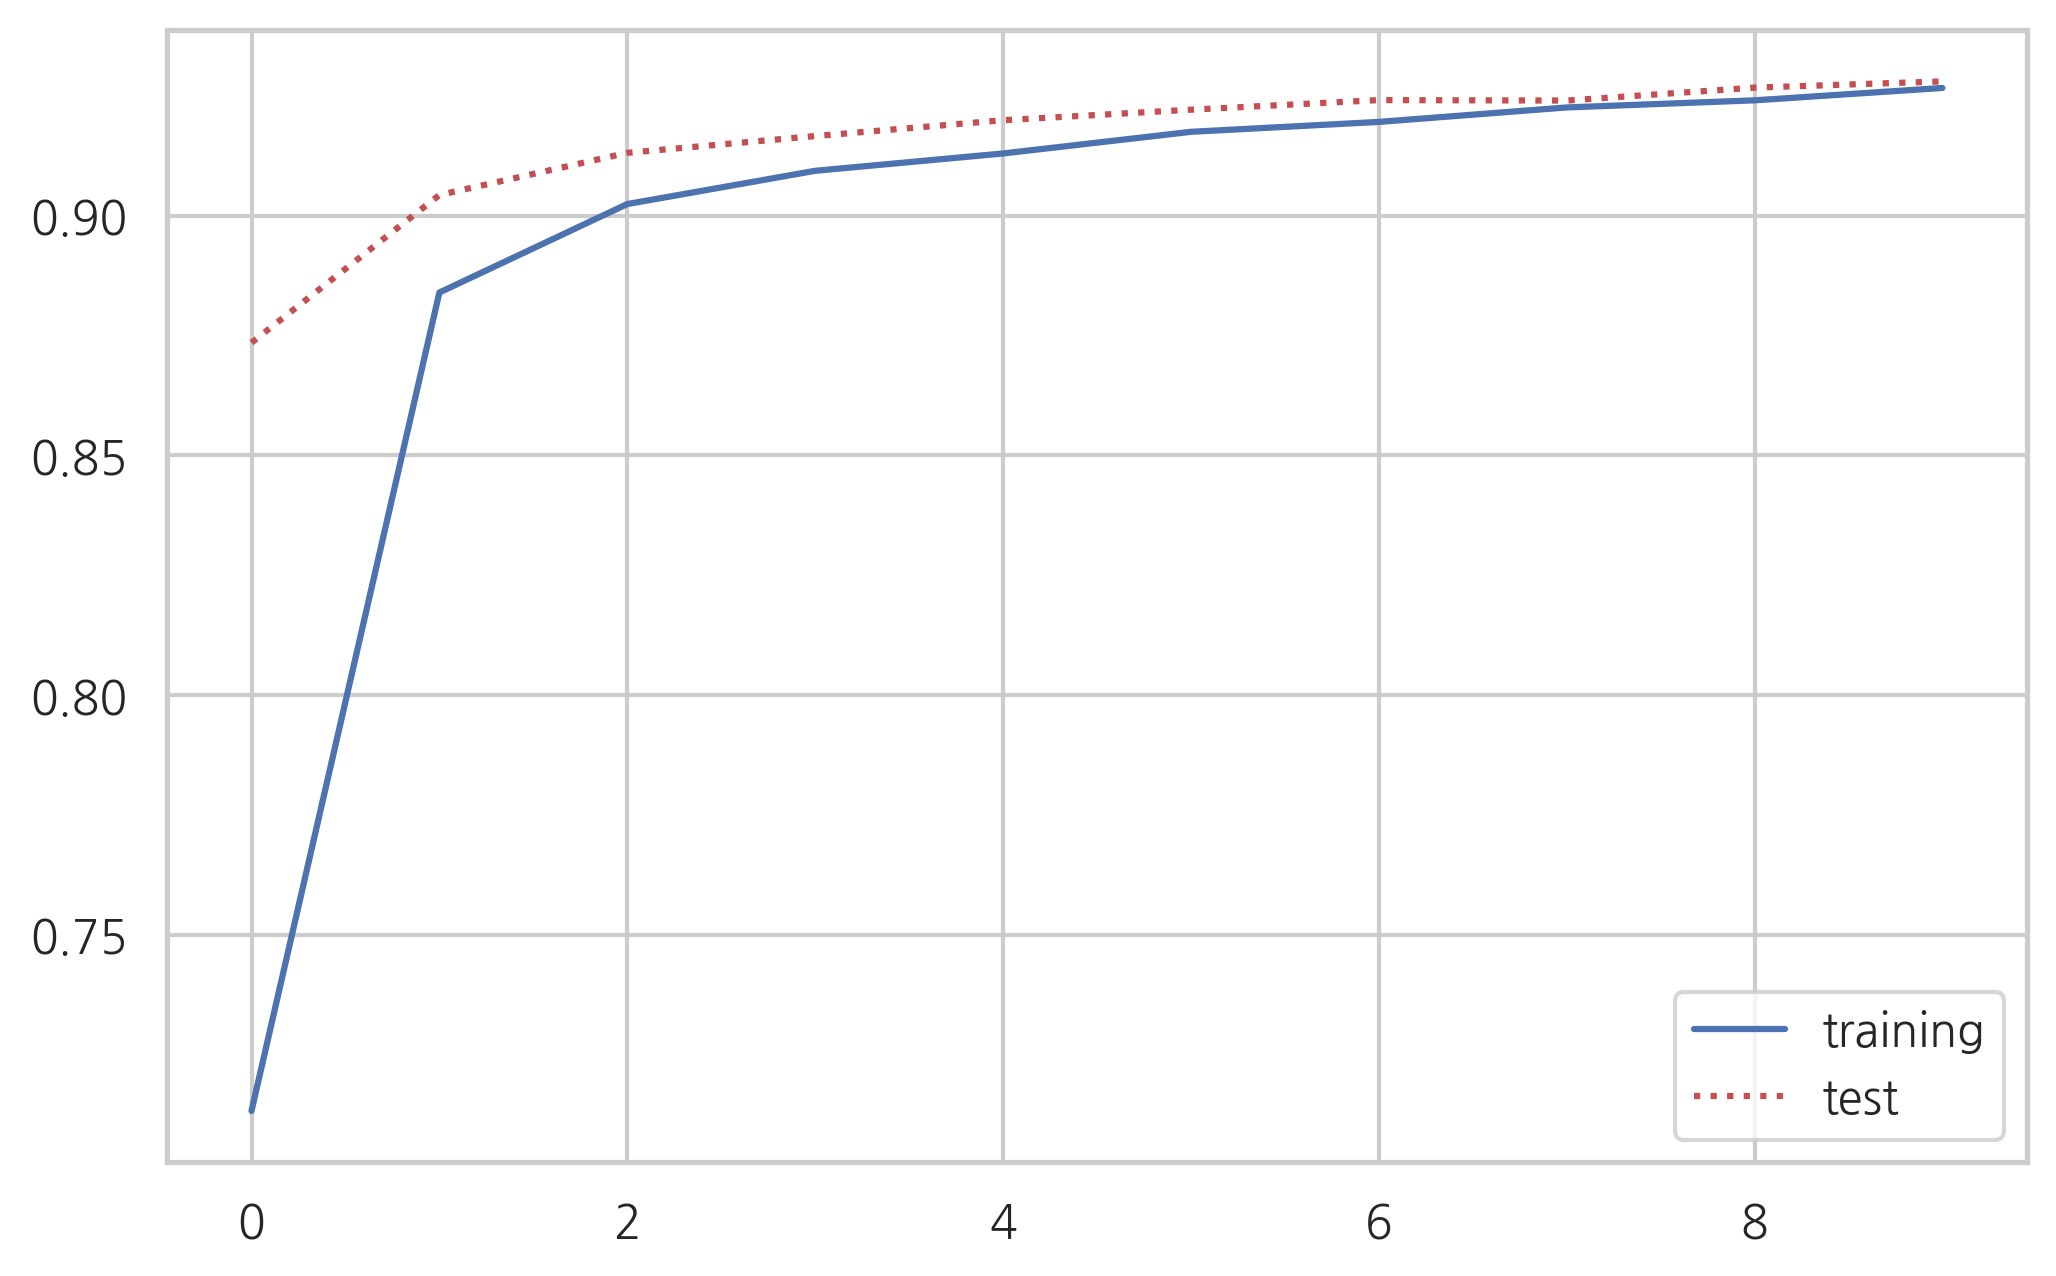

In [7]:
plt.plot(hist1.history['accuracy'], 'b-', label="training")
plt.plot(hist1.history['val_accuracy'], 'r:', label="test")
plt.legend()
plt.show()

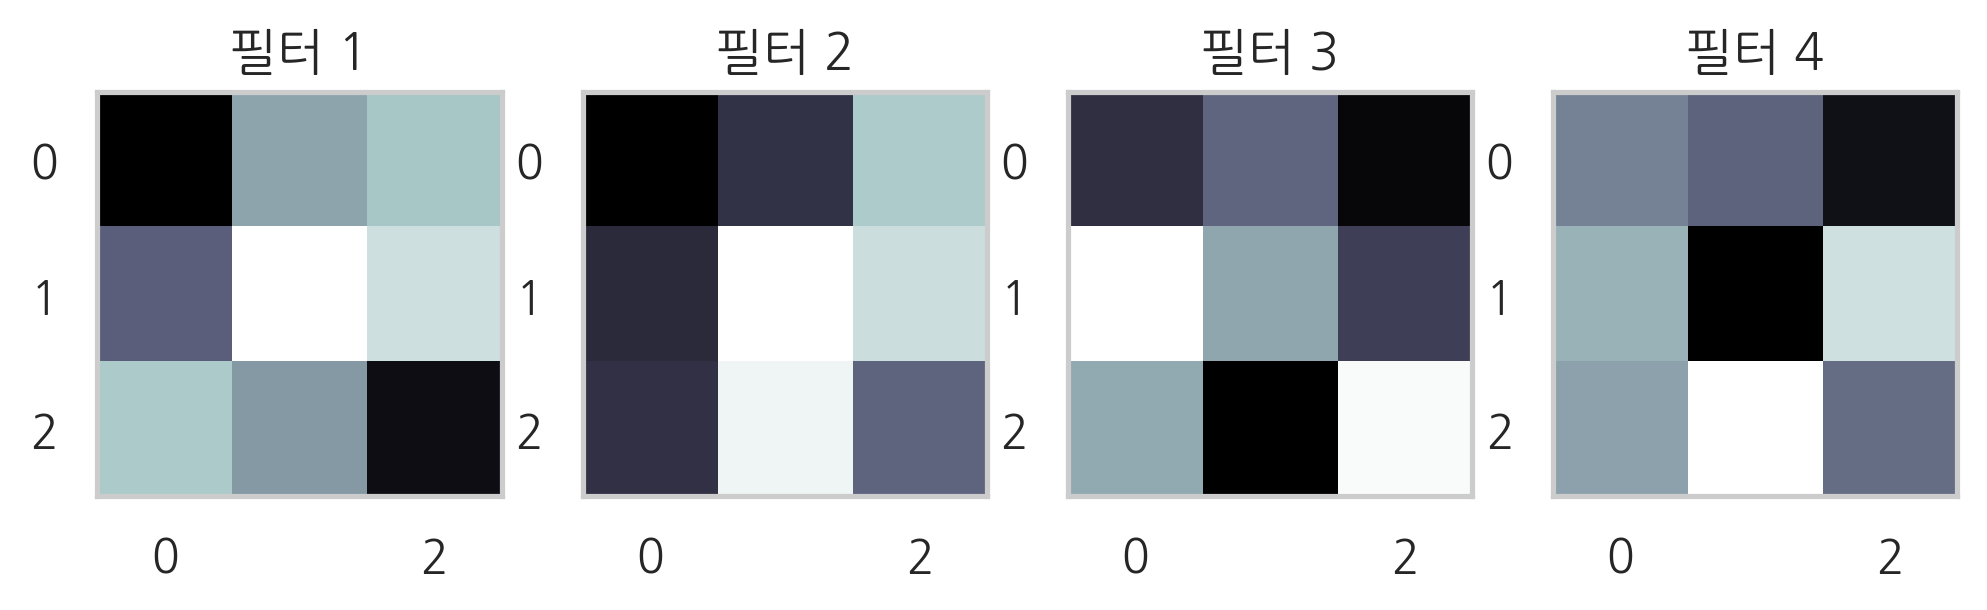

In [8]:
l1 = model1.layers[0]
w1, b1 = l1.get_weights()

M = 4
for i in range(M):
    plt.subplot(1, M, i + 1)
    plt.imshow(w1[:, :, 0, i], cmap=mpl.cm.bone)
    plt.title("필터 {}".format(i + 1))
    plt.grid(False)

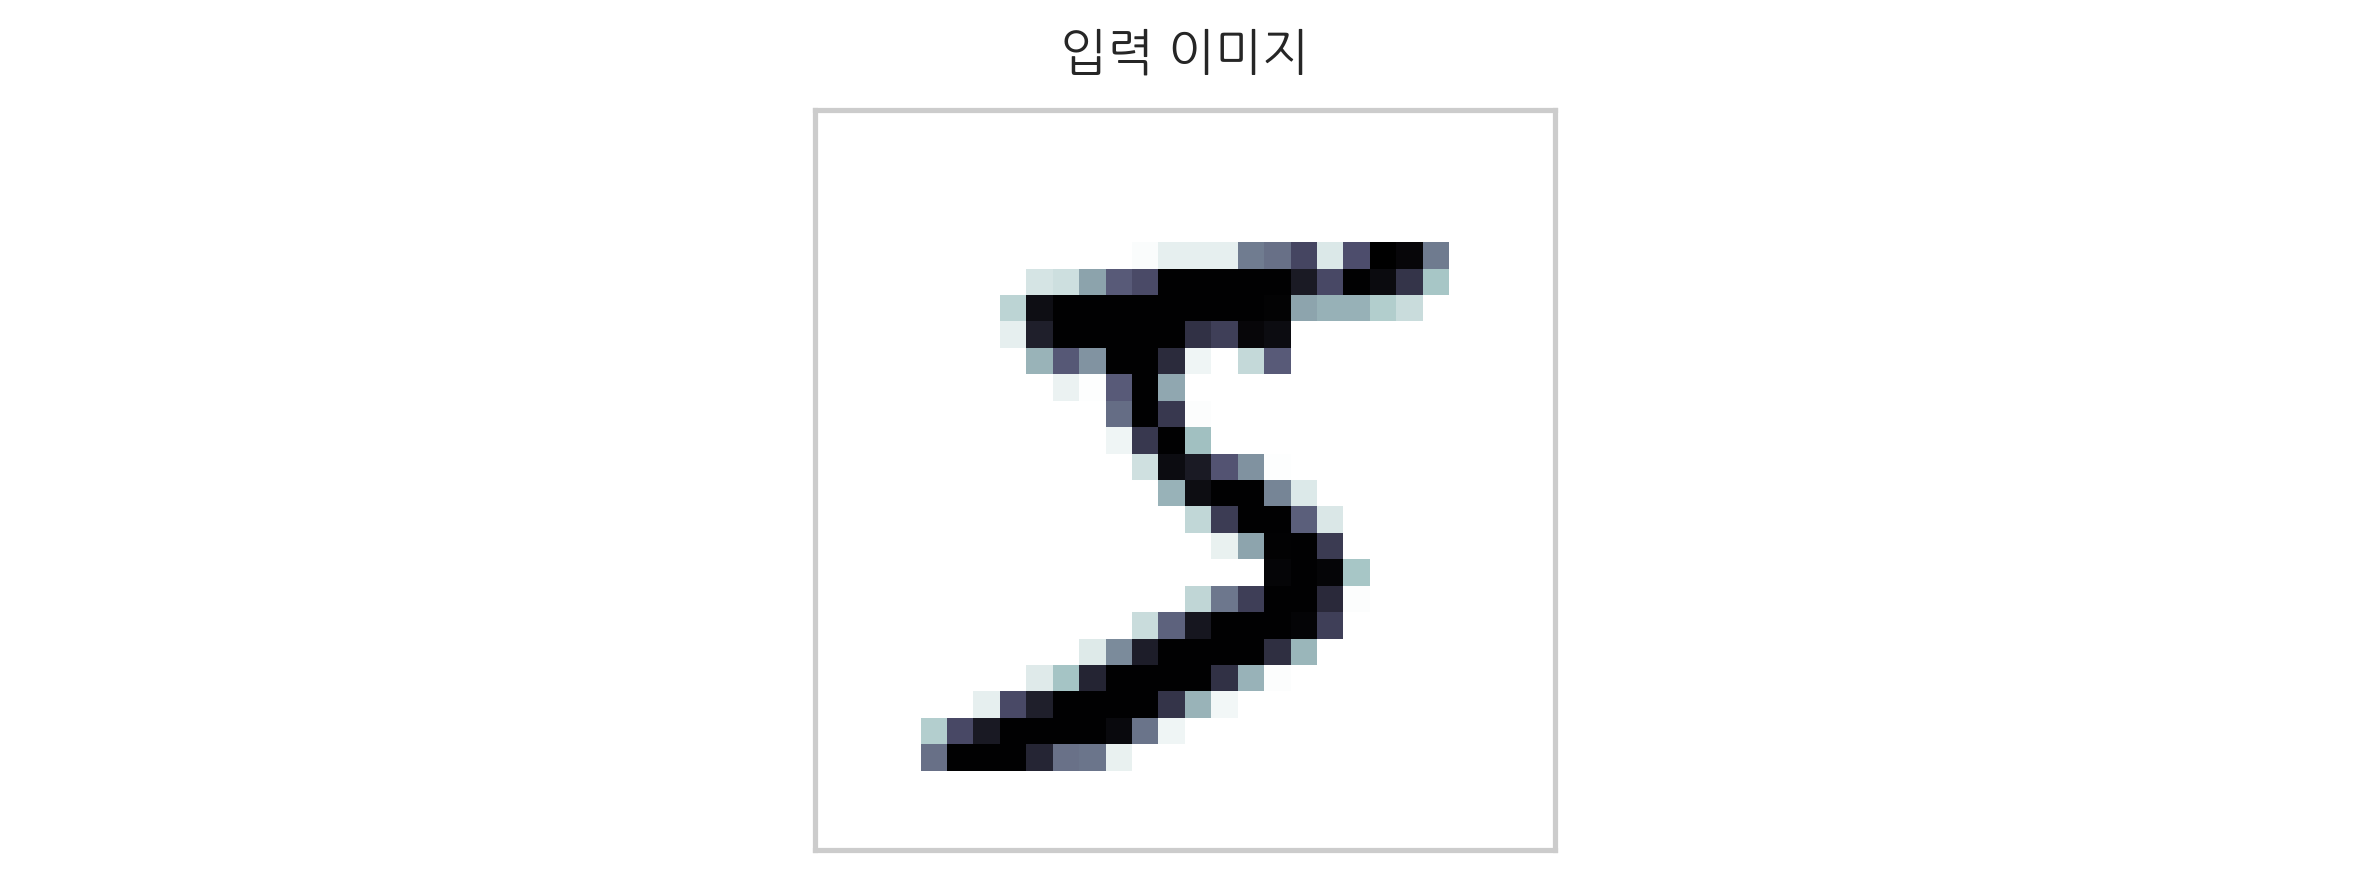

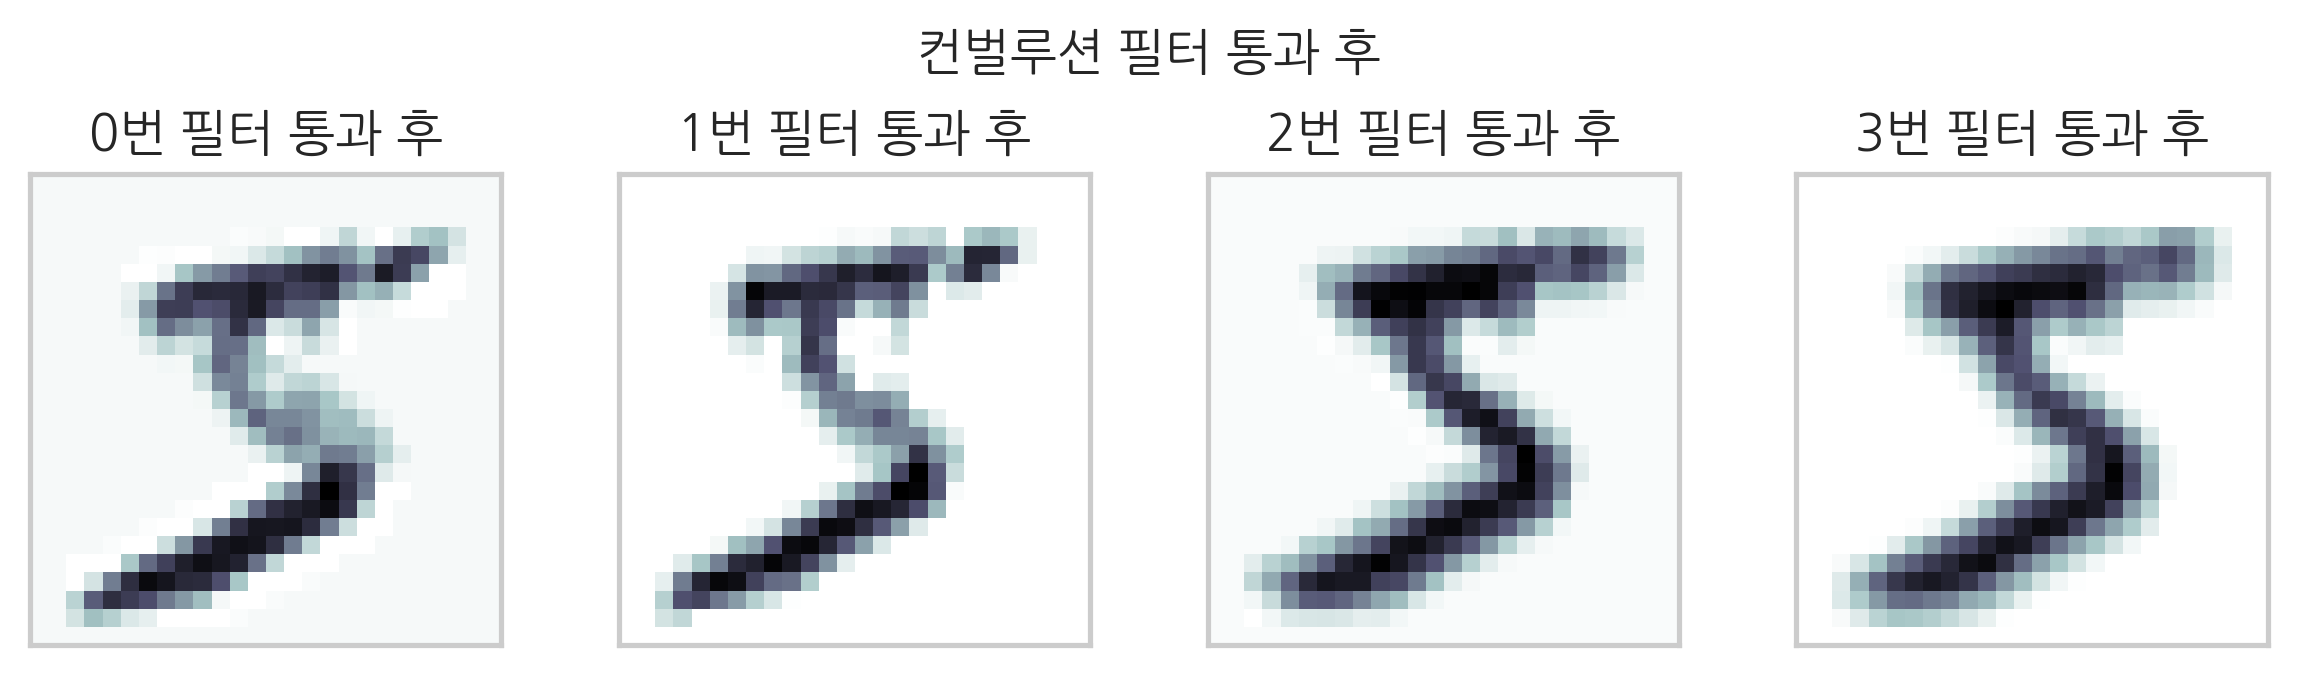

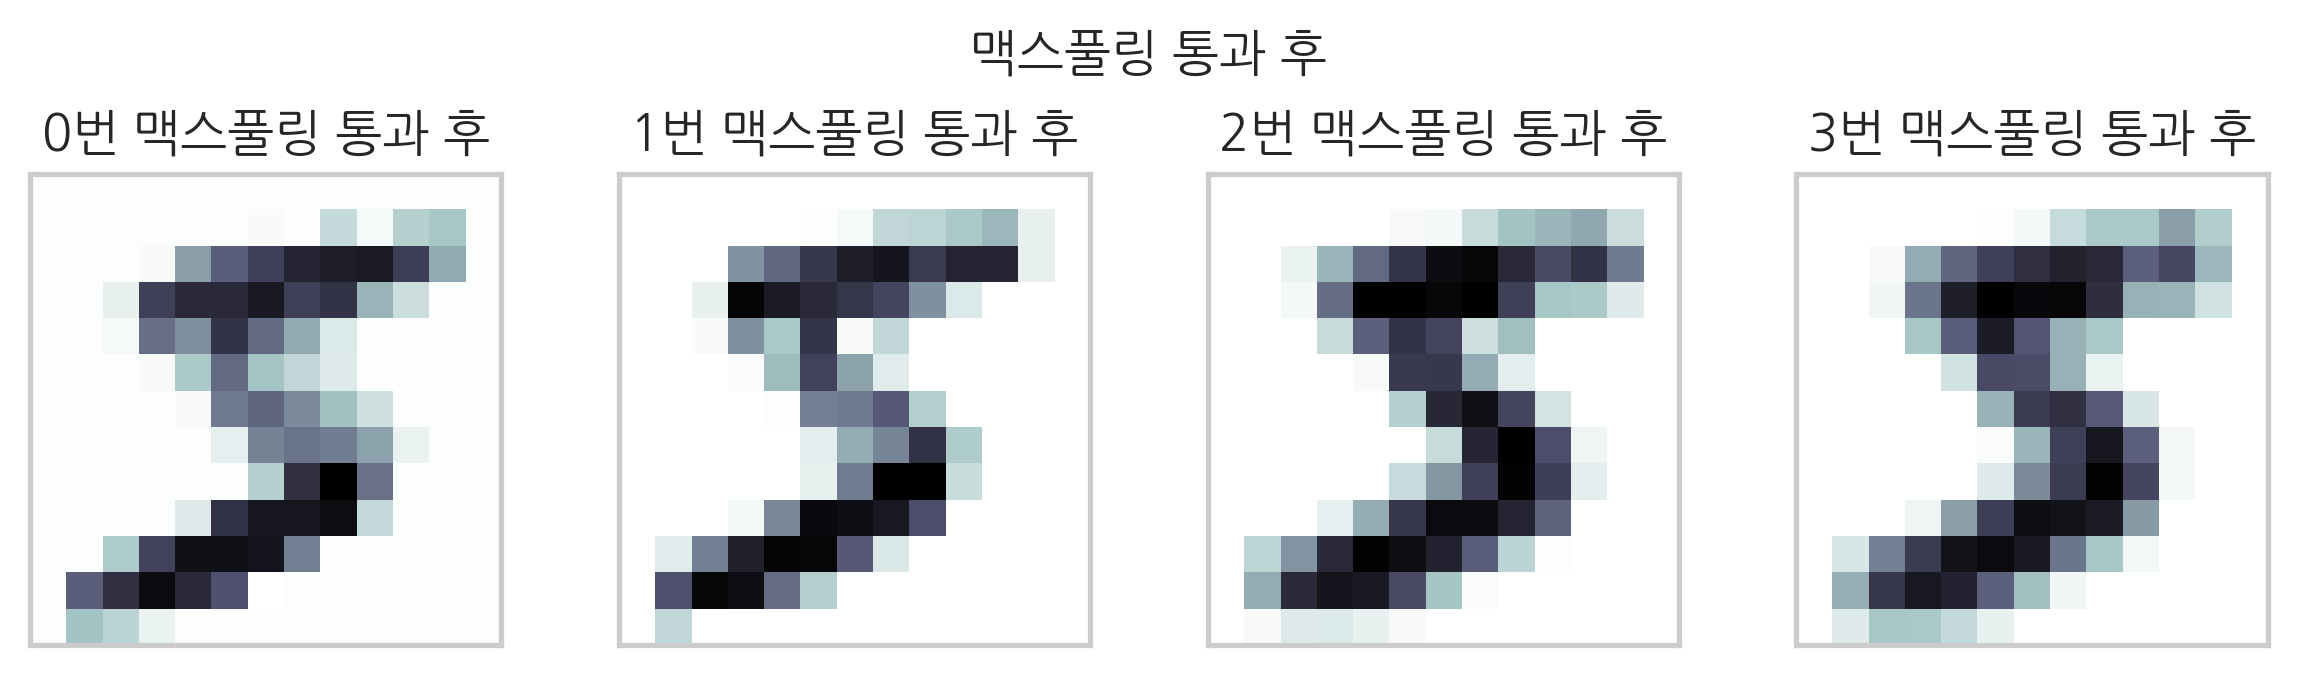

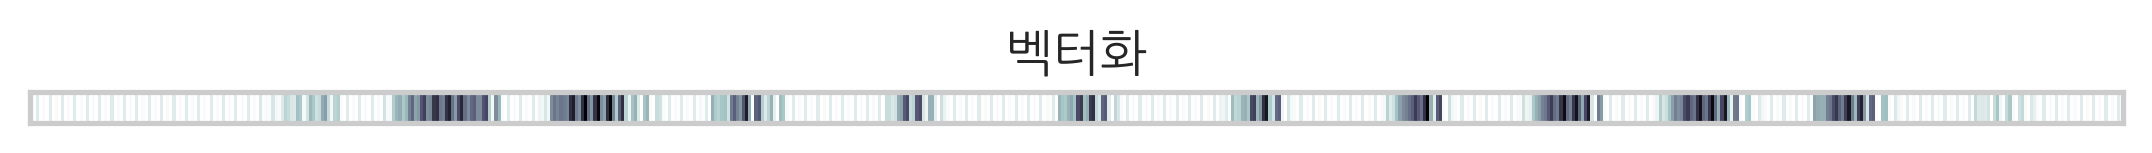

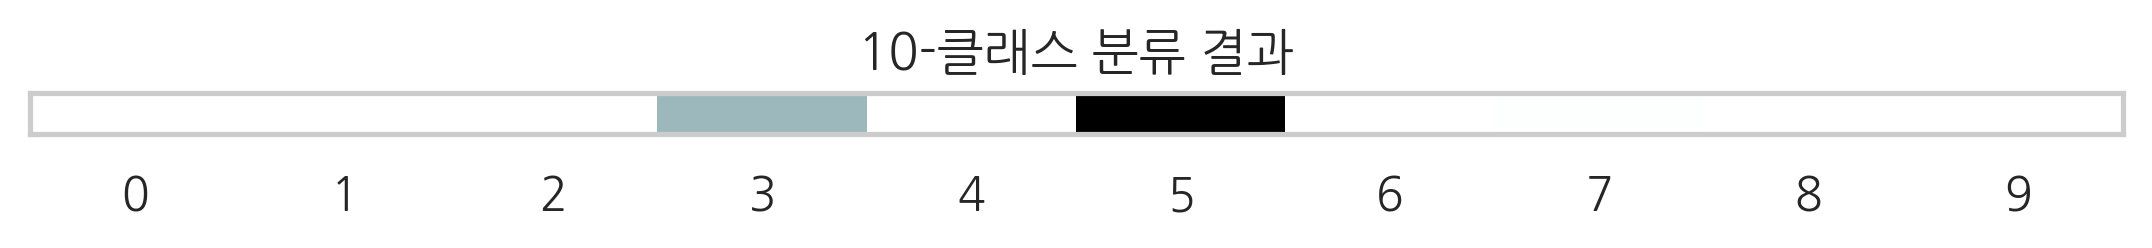

In [9]:
import tensorflow.keras.backend as K

f10 = K.function([model1.input], [model1.layers[0].output])
f11 = K.function([model1.input], [model1.layers[1].output])
f12 = K.function([model1.input], [model1.layers[2].output])
f13 = K.function([model1.input], [model1.layers[3].output])

def visualize1(n):
    x = X_train[n:n + 1]
    plt.figure(figsize=(8, 3))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        if i == 1:
            plt.imshow(x[0, :, :, 0], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
        else:
            plt.imshow(np.zeros_like(x[0, :, :, 0]), cmap=mpl.cm.bone_r)
            plt.axis("off")
    plt.tight_layout()
    plt.suptitle("입력 이미지", y=1)
    
    z0 = f10([x])[0]
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(z0[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title("{}번 필터 통과 후".format(i))
    plt.tight_layout()
    plt.suptitle("컨벌루션 필터 통과 후", y=1.1)
    
    z1 = f11([x])[0]
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(z1[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title("{}번 맥스풀링 통과 후".format(i))
    plt.tight_layout()
    plt.suptitle("맥스풀링 통과 후", y=1.1)
        
    z2 = f12([x])[0]
    plt.figure(figsize=(9, 1))
    plt.imshow(z2, aspect=10, cmap=mpl.cm.bone_r)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.title("벡터화")
    
    z3 = f13([x])[0]
    plt.figure(figsize=(9, 1))
    plt.imshow(z3, aspect=0.2, cmap=mpl.cm.bone_r)
    plt.xticks(range(10)); plt.yticks([]); plt.grid(False)
    plt.title("10-클래스 분류 결과")

visualize1(0)

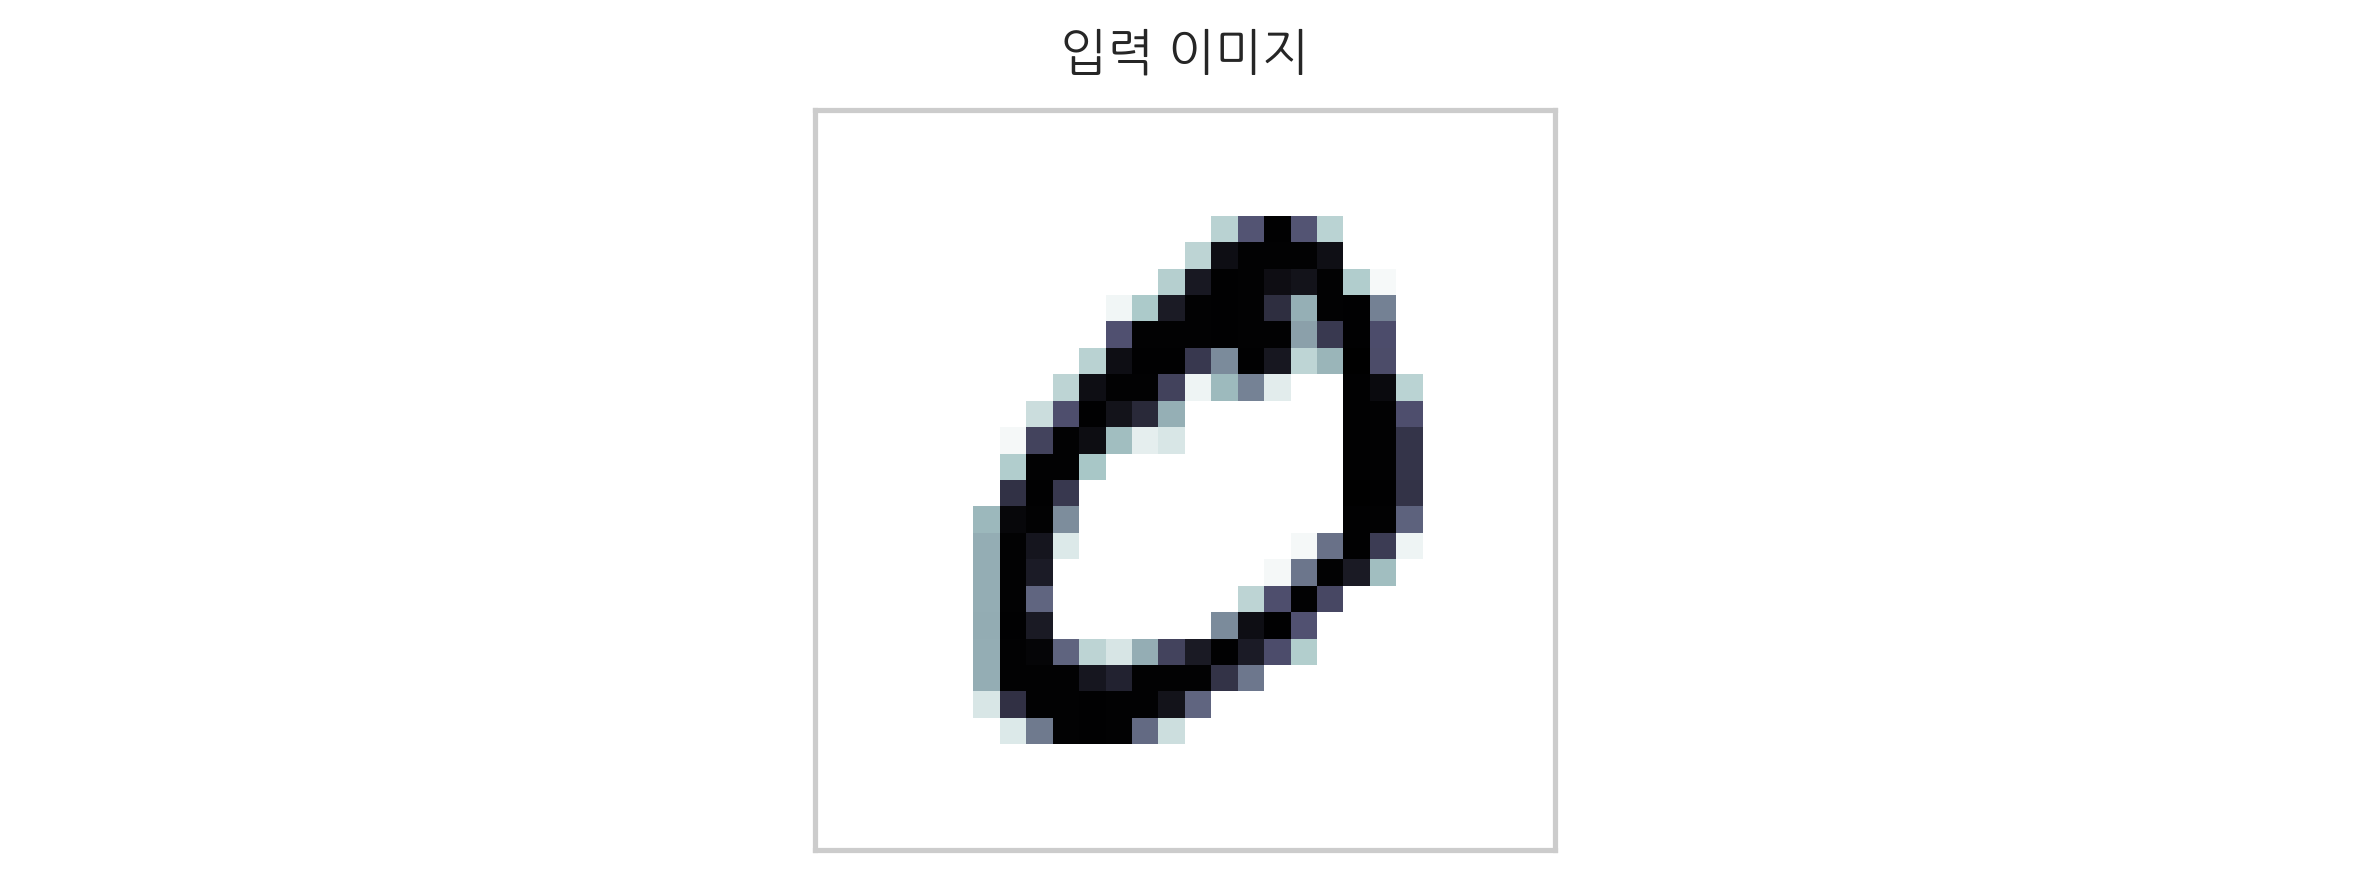

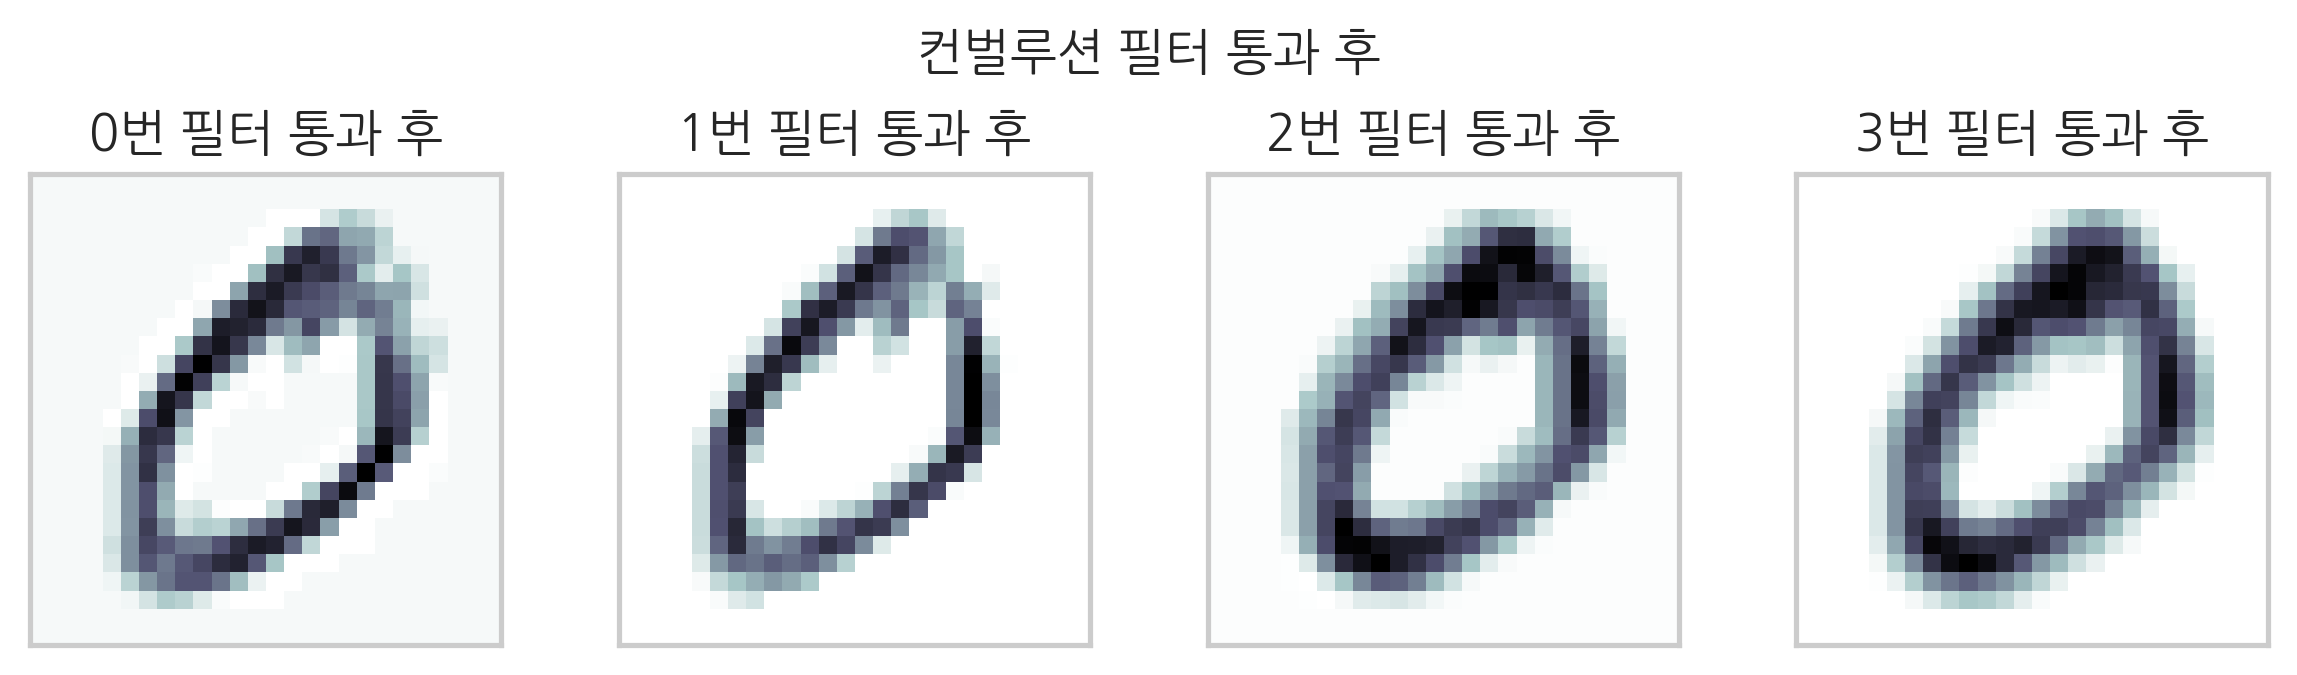

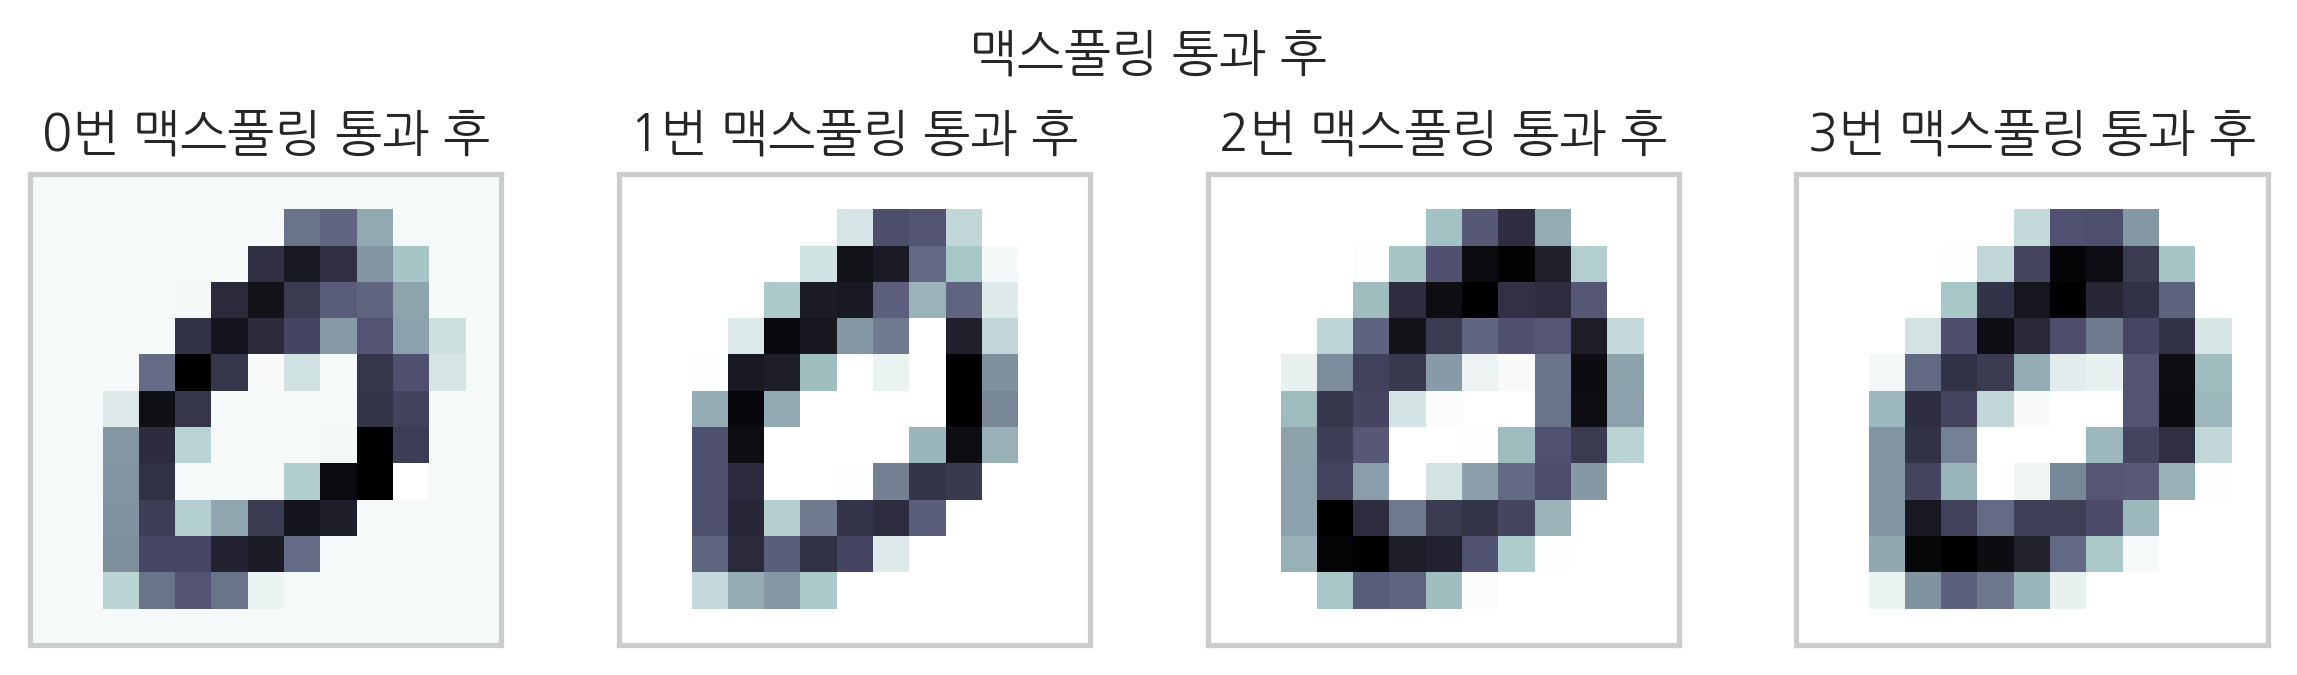

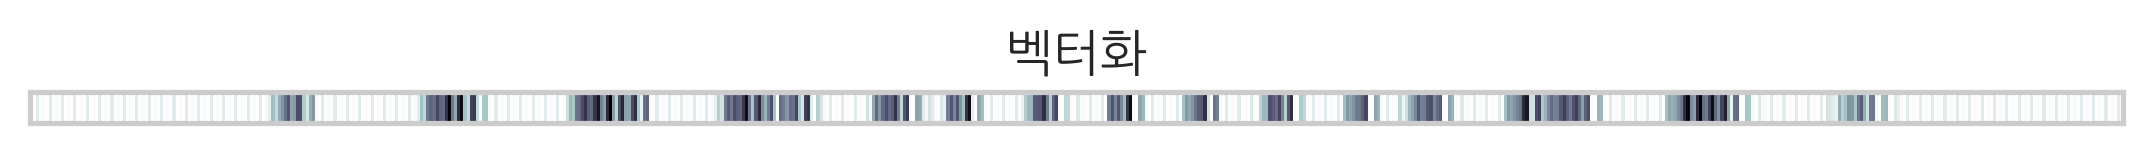

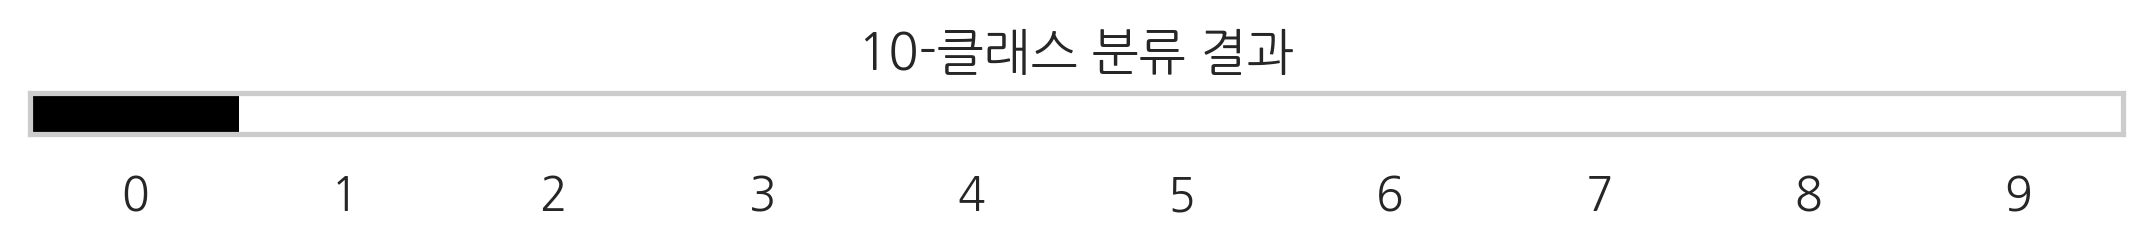

In [10]:
visualize1(1)

### 다층 CNN 구조

현실적인 문제를 풀기 위해서는 컨볼루션 레이어를 두개보다 많이 사용하는 다층 CNN 구조(deep CNN architecture)를 사용한다. 다층 CNN에서는 일반적으로 다음과 같은 구조를 많이 사용한다.

* 초기 레이어에서는 필터의 수를 적게, 레이어가 깊어질수록 필터의 수를 증가시킨다. 맥스 풀링을 사용하면 레이어에서 출력되는 이미지의 크기가 절반으로 줄어들기 때문에 커널의 수를 증가시키면 레이어의 파라미터 수가 일정한 수준으로 유지된다.


In [11]:
np.random.seed(0)

model2 = Sequential()

model2.add(Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1), 
                  kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())
model2.add(Conv2D(8, (3, 3), activation='relu',
                  kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(10, activation='softmax',
                 kernel_initializer="glorot_uniform"))

In [12]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 8)         296       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 2,346
Trainable params: 2,346
Non-trainable params: 0
____________________________________________________

In [13]:
model2.compile(loss='categorical_crossentropy', metrics=[
               'accuracy'], optimizer=Adam())

In [14]:
%%time
hist2 = model2.fit(X_train, Y_train, epochs=20, batch_size=600,
                   validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 4s - loss: 1.6544 - accuracy: 0.5556 - val_loss: 0.5779 - val_accuracy: 0.8397
Epoch 2/20
60000/60000 - 4s - loss: 0.3990 - accuracy: 0.8868 - val_loss: 0.2882 - val_accuracy: 0.9190
Epoch 3/20
60000/60000 - 4s - loss: 0.2666 - accuracy: 0.9220 - val_loss: 0.2214 - val_accuracy: 0.9358
Epoch 4/20
60000/60000 - 4s - loss: 0.2148 - accuracy: 0.9382 - val_loss: 0.1779 - val_accuracy: 0.9498
Epoch 5/20
60000/60000 - 4s - loss: 0.1834 - accuracy: 0.9471 - val_loss: 0.1557 - val_accuracy: 0.9555
Epoch 6/20
60000/60000 - 4s - loss: 0.1623 - accuracy: 0.9527 - val_loss: 0.1388 - val_accuracy: 0.9607
Epoch 7/20
60000/60000 - 4s - loss: 0.1474 - accuracy: 0.9571 - val_loss: 0.1248 - val_accuracy: 0.9647
Epoch 8/20
60000/60000 - 4s - loss: 0.1360 - accuracy: 0.9601 - val_loss: 0.1147 - val_accuracy: 0.9663
Epoch 9/20
60000/60000 - 4s - loss: 0.1273 - accuracy: 0.9620 - val_loss: 0.1068 - val_accuracy: 0.9690
Epoch 10/20
60

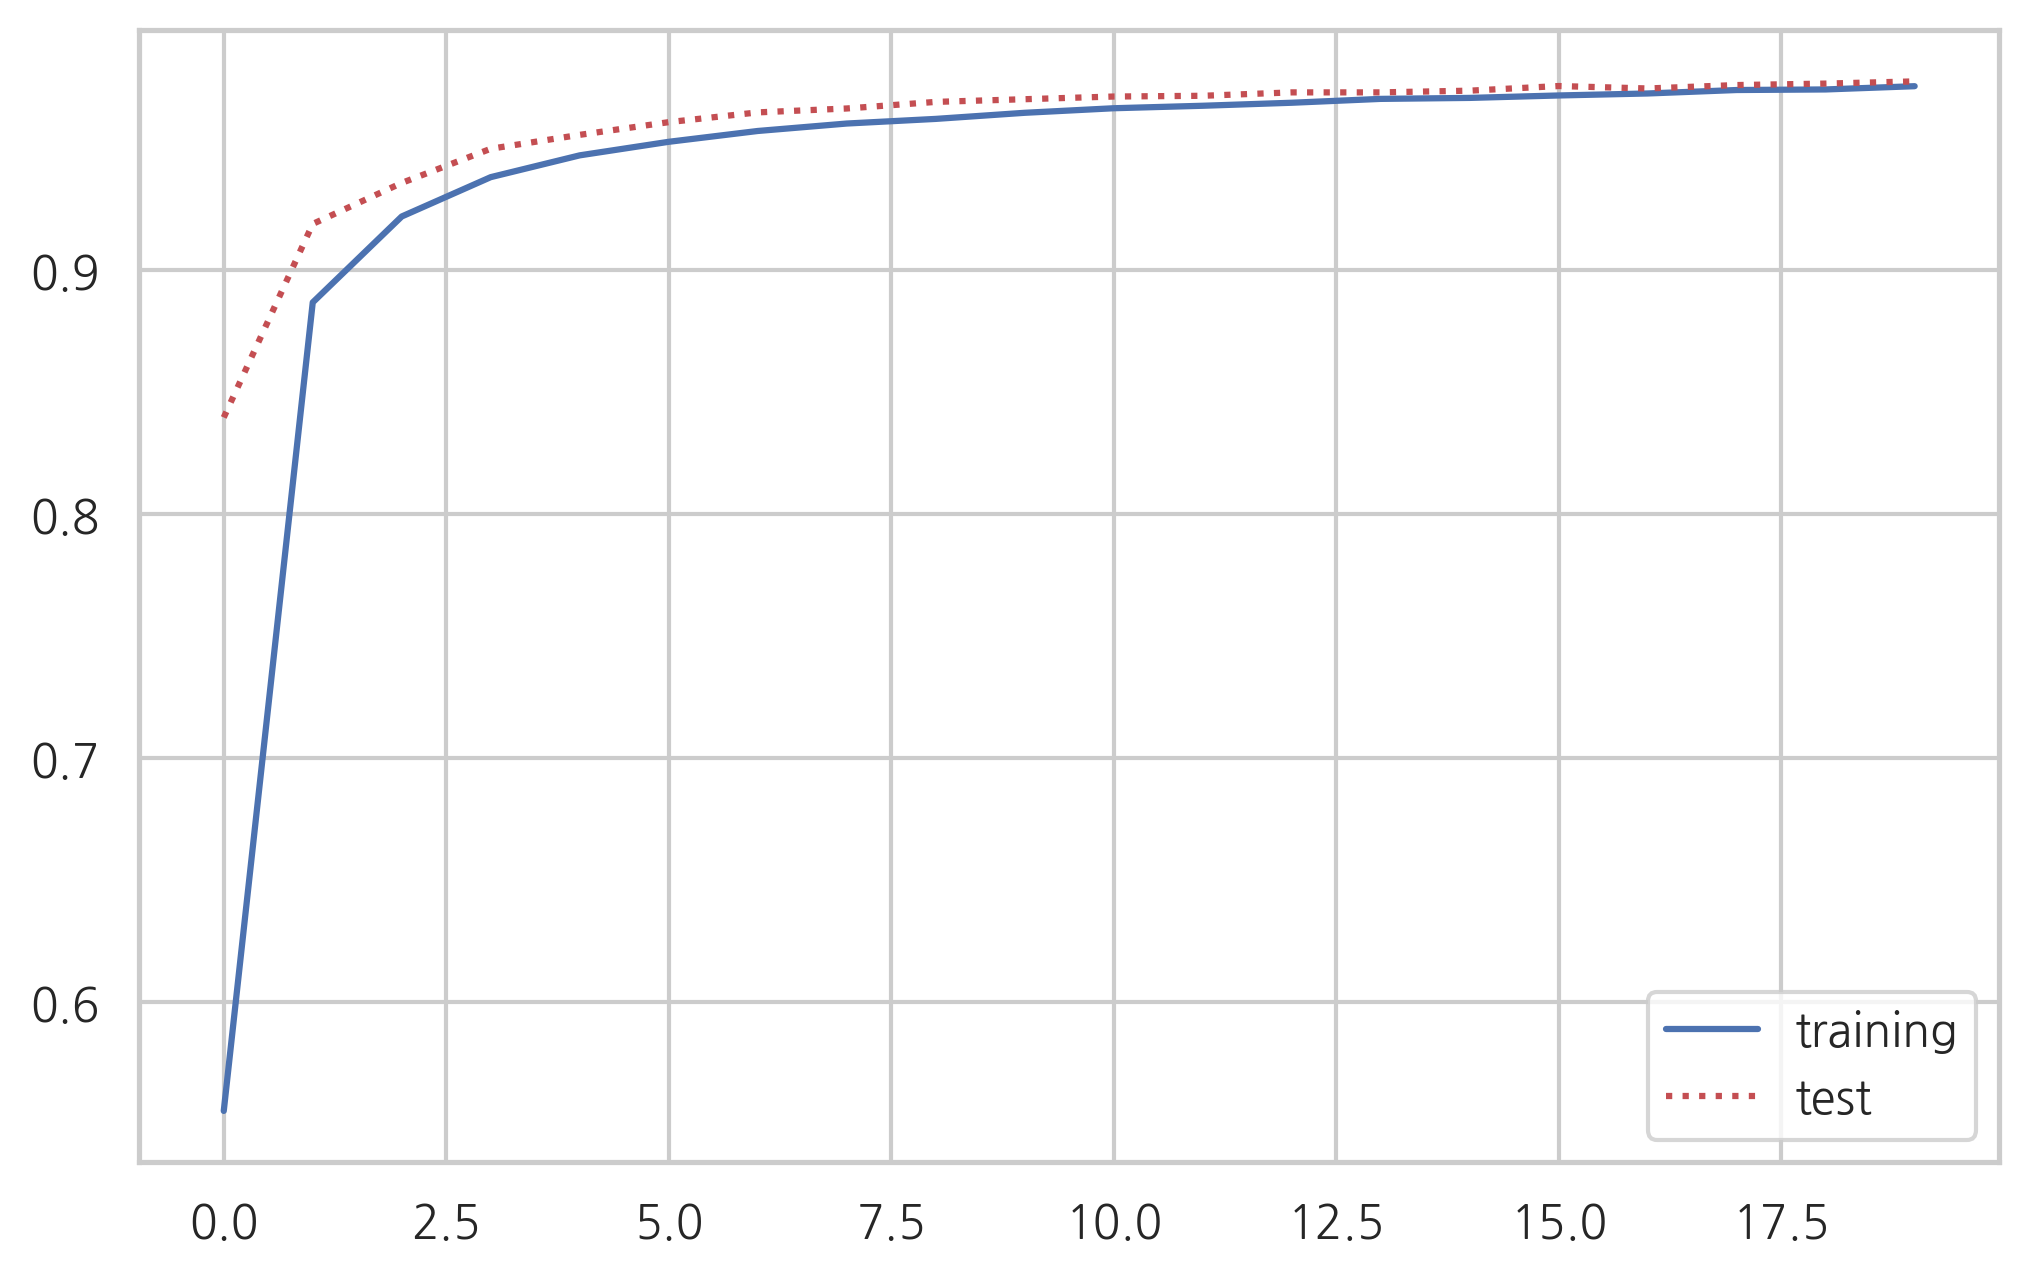

In [15]:
plt.plot(hist2.history['accuracy'], 'b-', label="training")
plt.plot(hist2.history['val_accuracy'], 'r:', label="test")
plt.legend()
plt.show()

In [16]:
l21 = model2.layers[0]
w21, b21 = l21.get_weights()

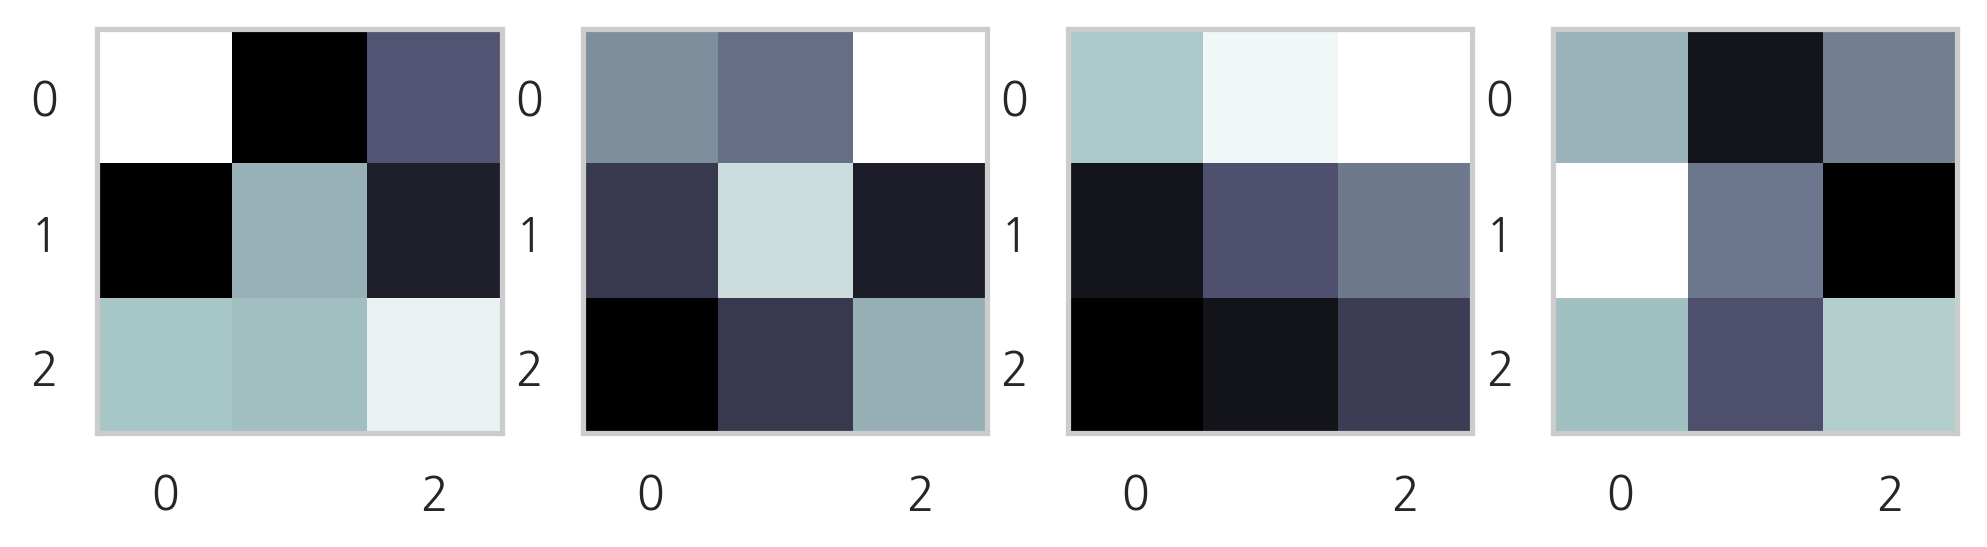

In [17]:
M = 4
for i in range(M):
    plt.subplot(1, M, i + 1)
    plt.imshow(w21[:, :, 0, i], cmap=mpl.cm.bone_r)
    plt.grid(False)

In [18]:
l22 = model2.layers[2]
w22, b22 = l22.get_weights()

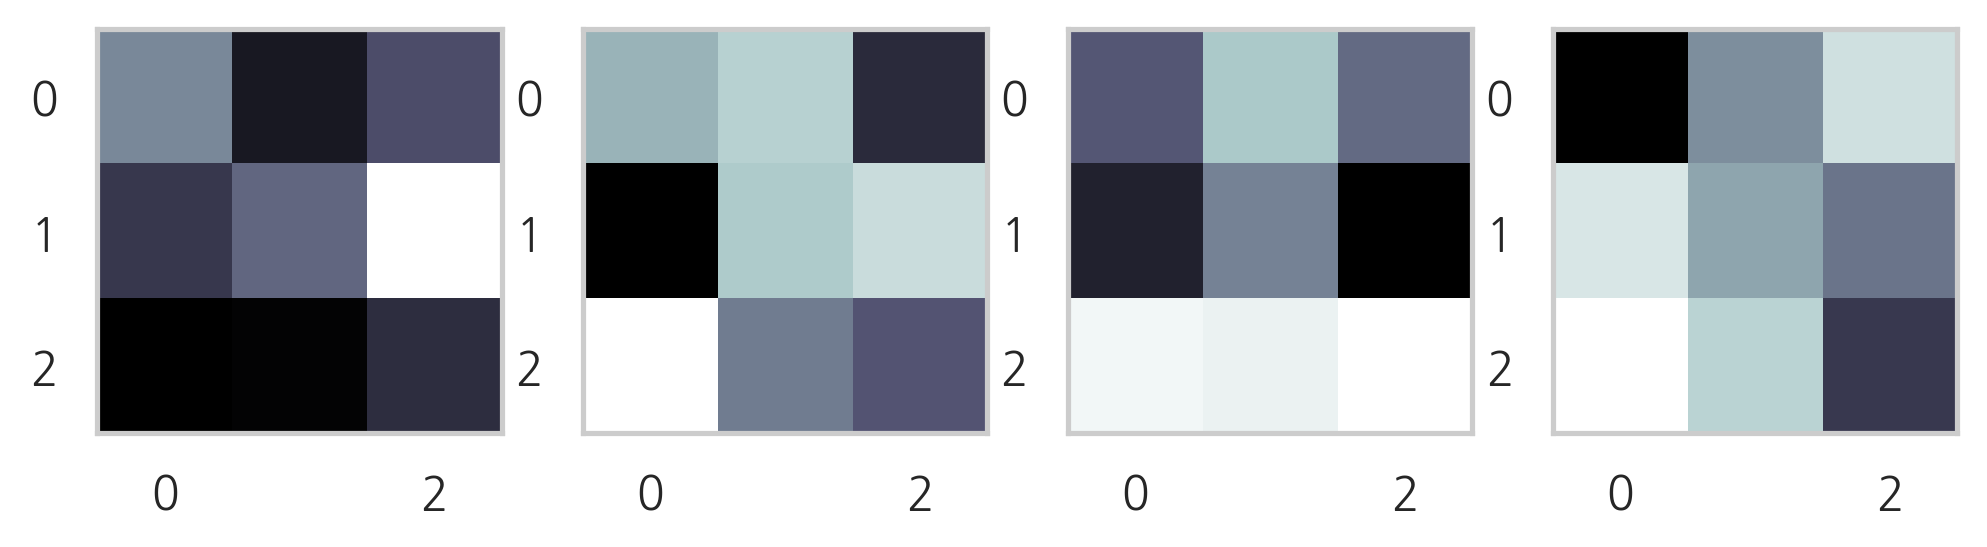

In [19]:
M = 4
for i in range(M):
    plt.subplot(1, M, i + 1)
    plt.imshow(w22[:, :, 0, i], cmap=mpl.cm.bone_r)
    plt.grid(False)

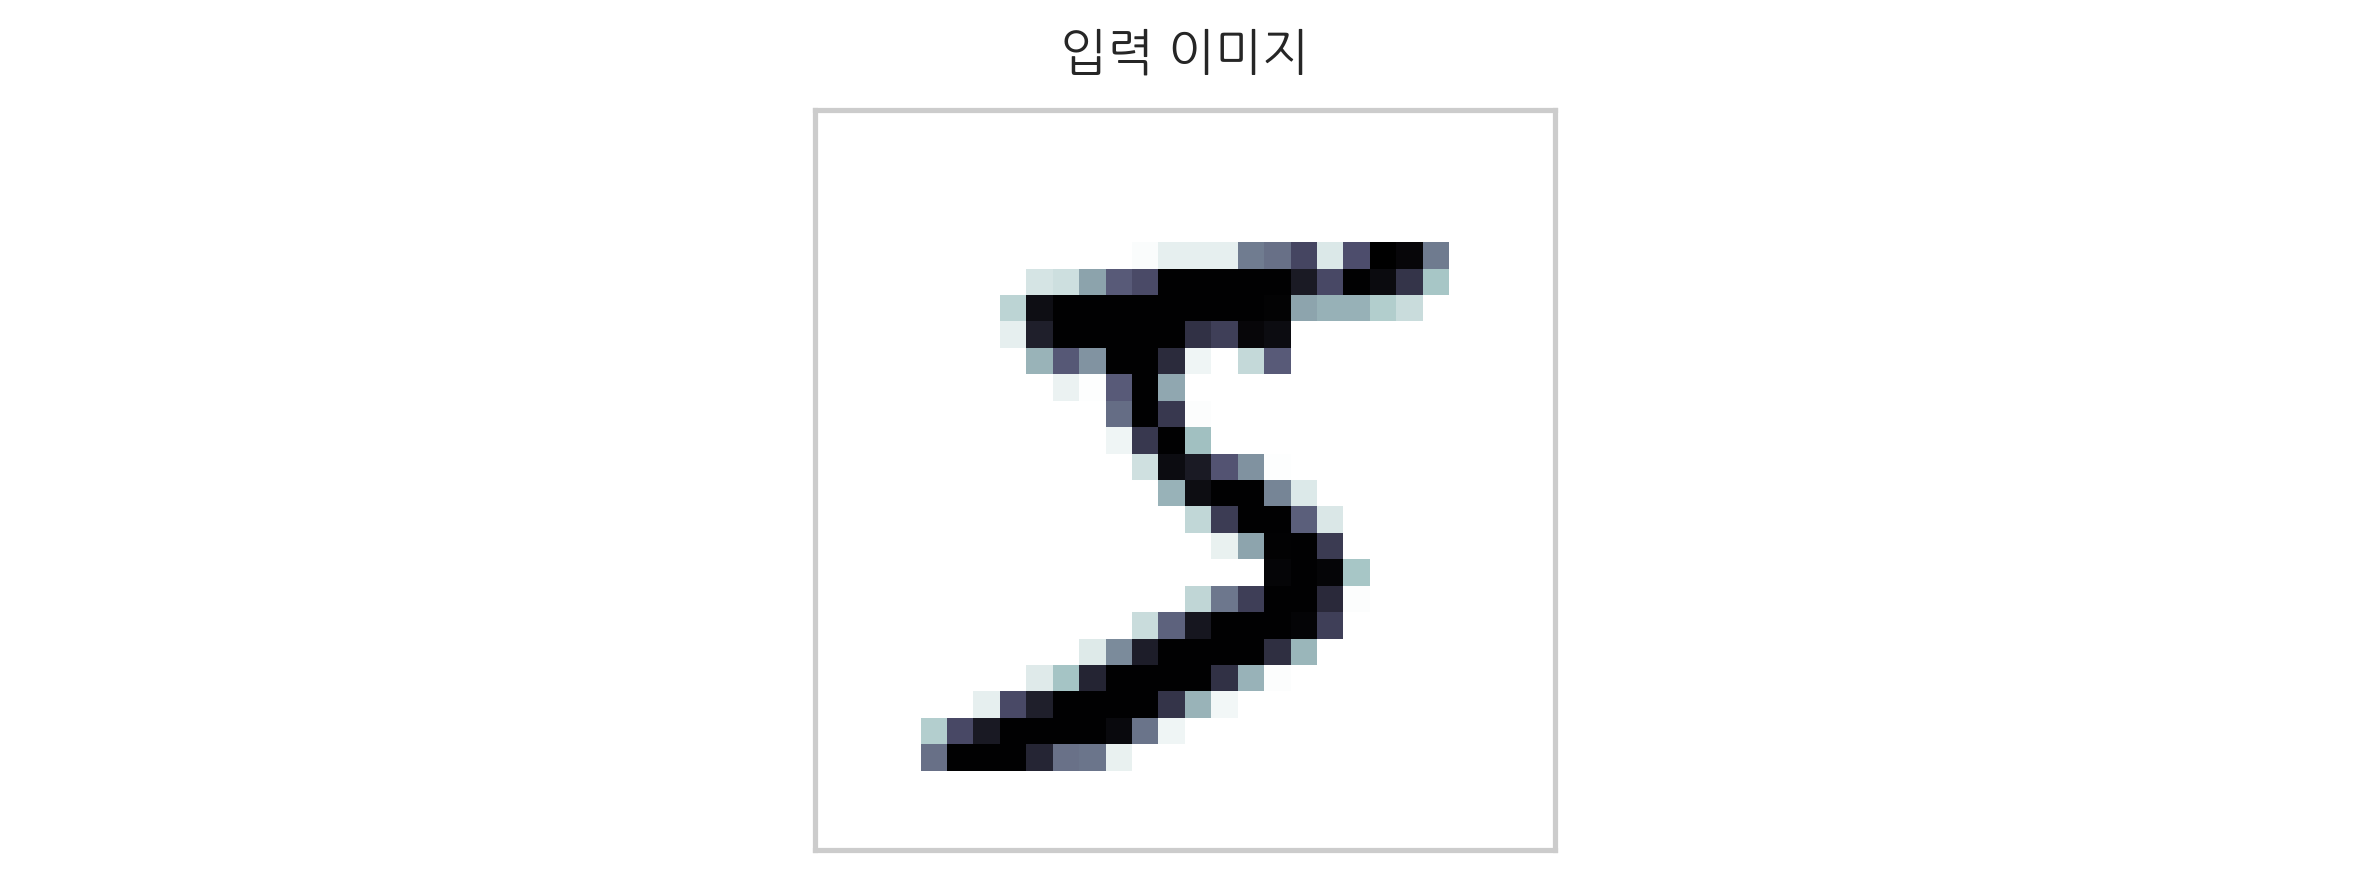

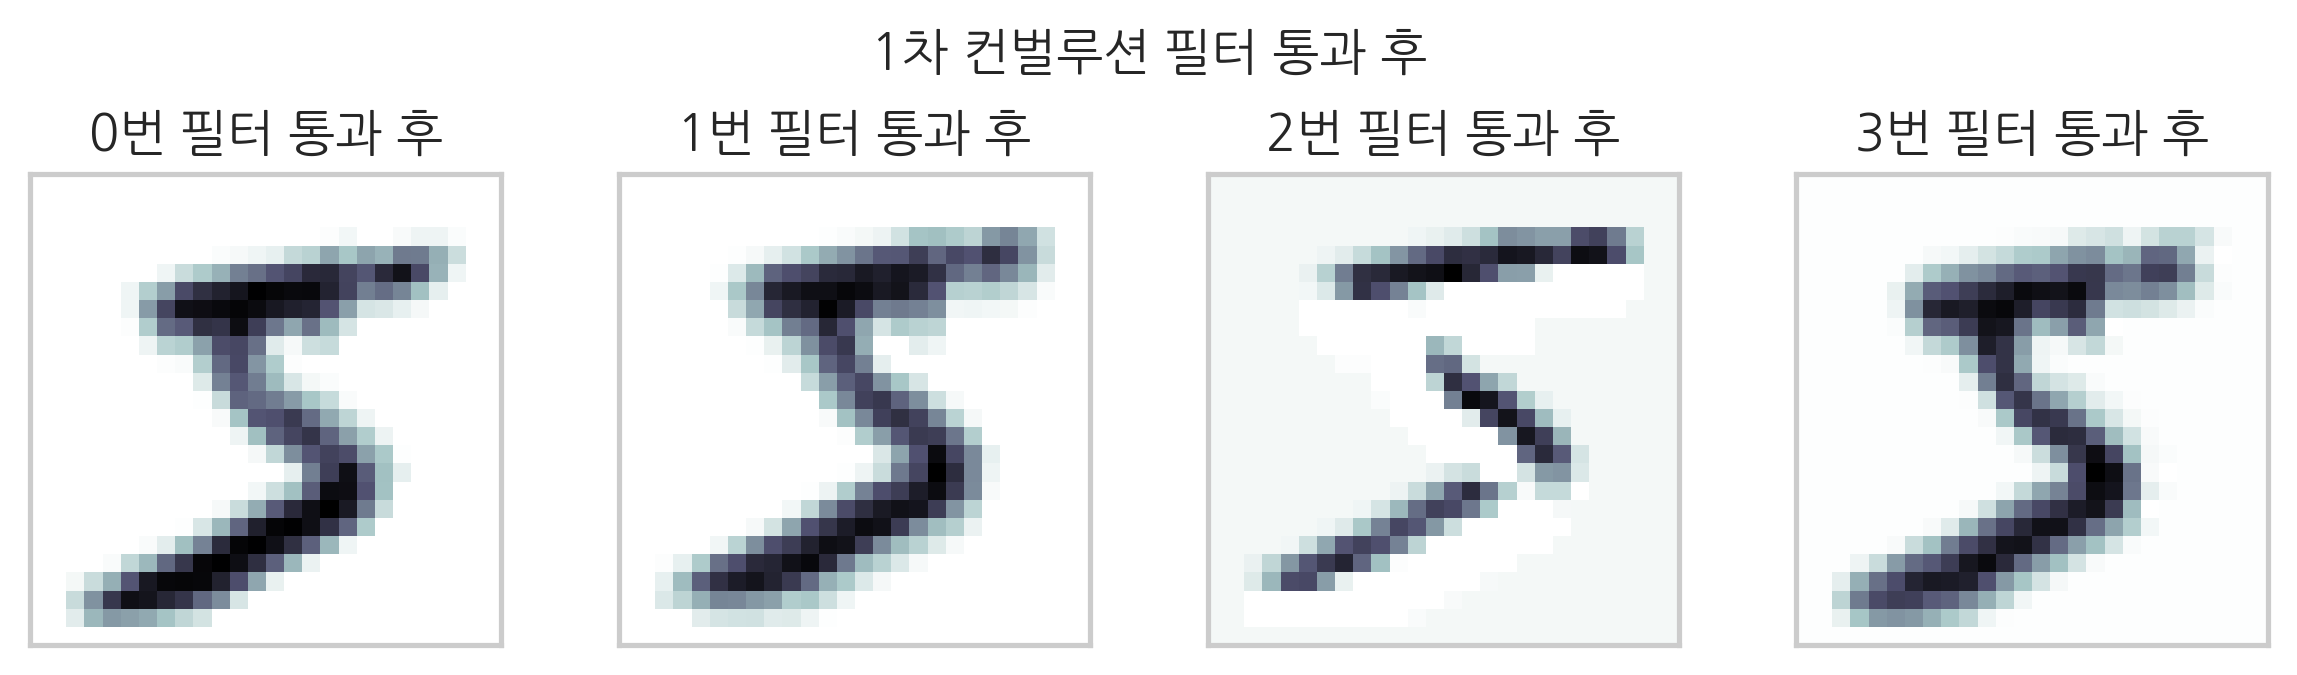

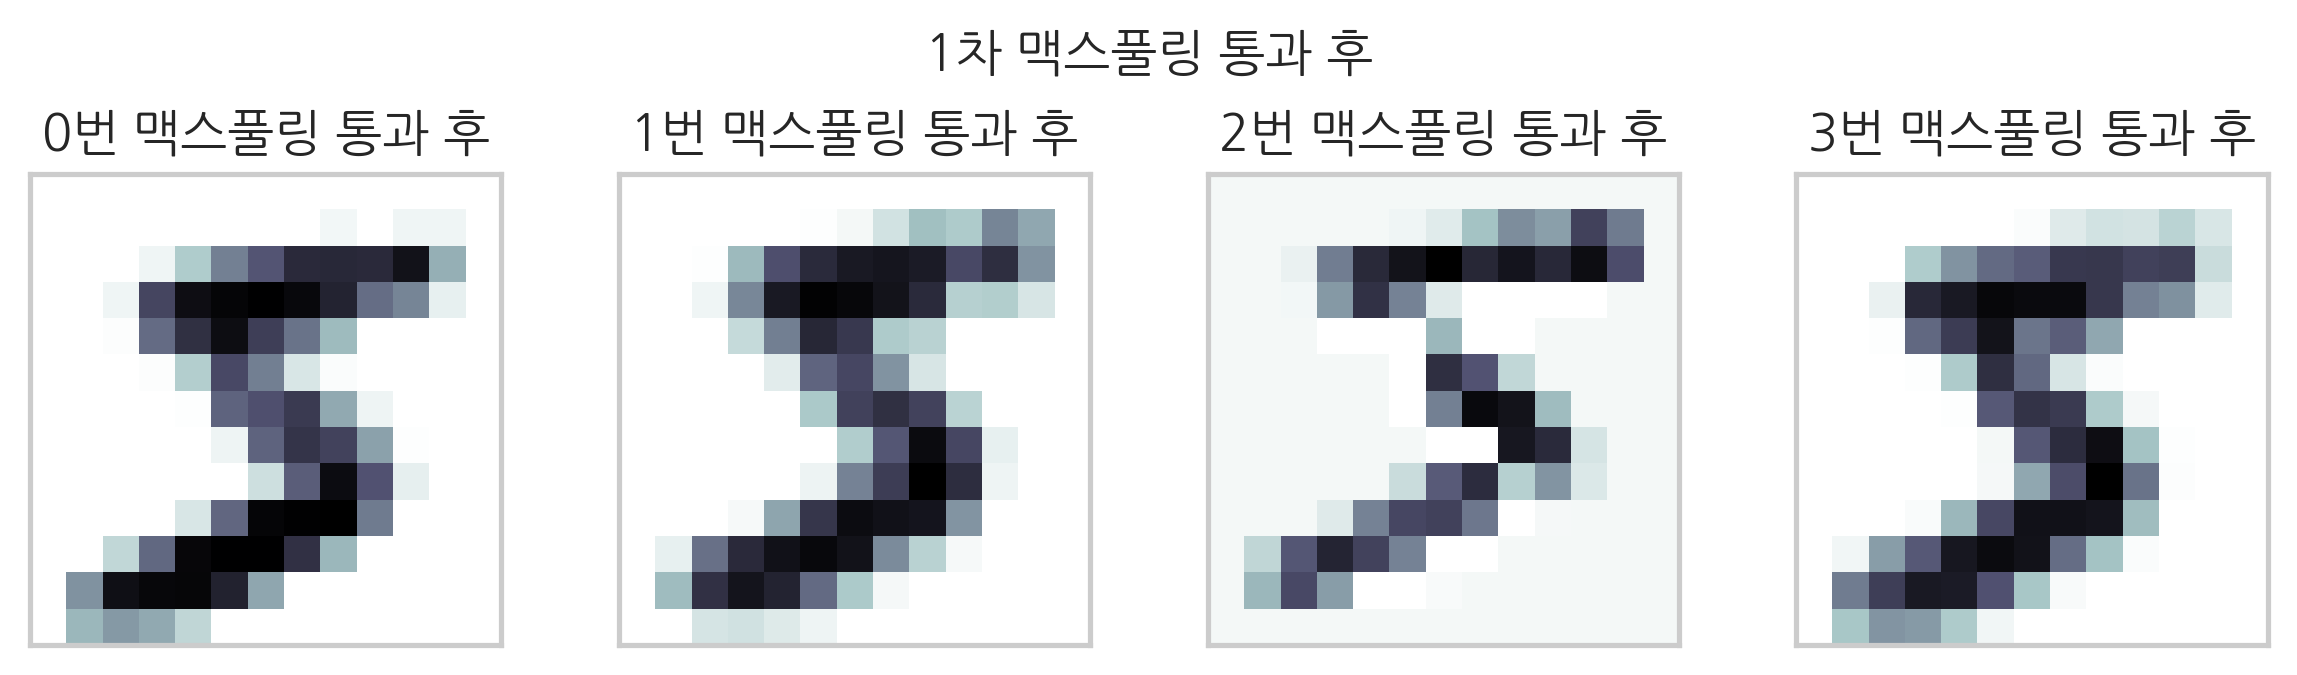

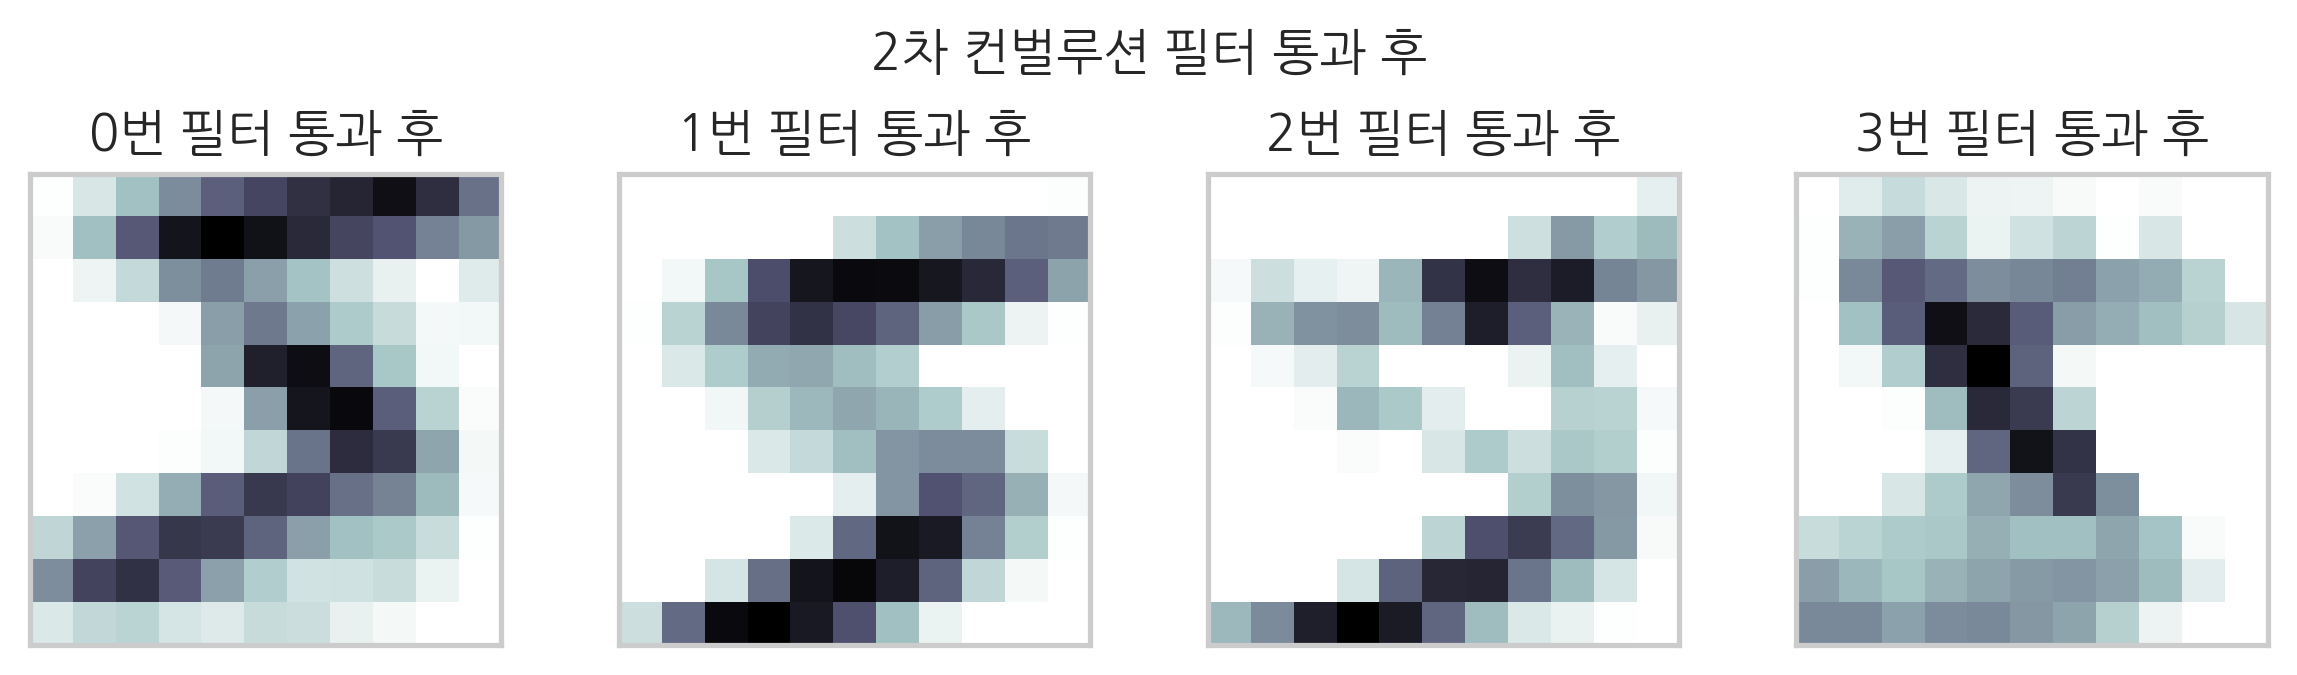

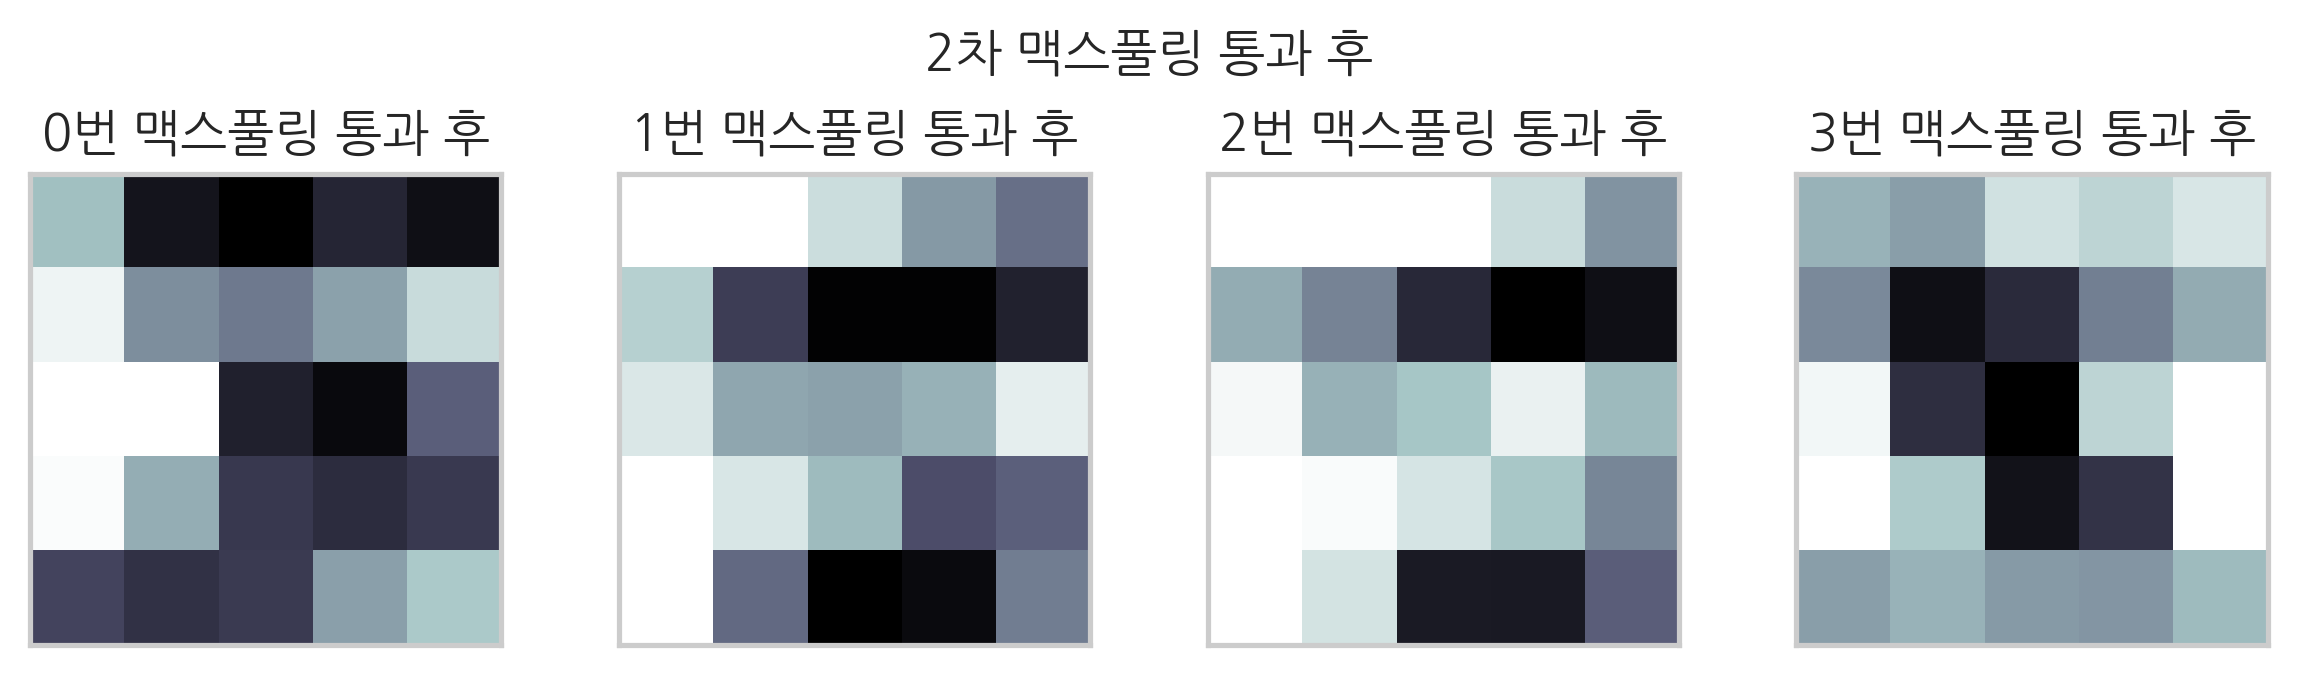

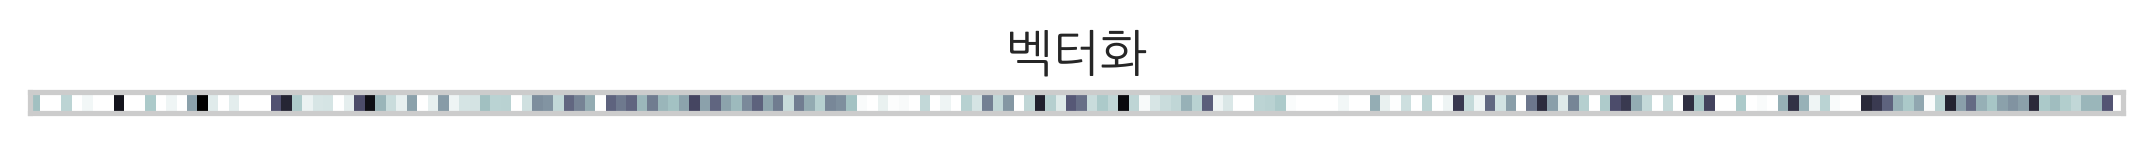

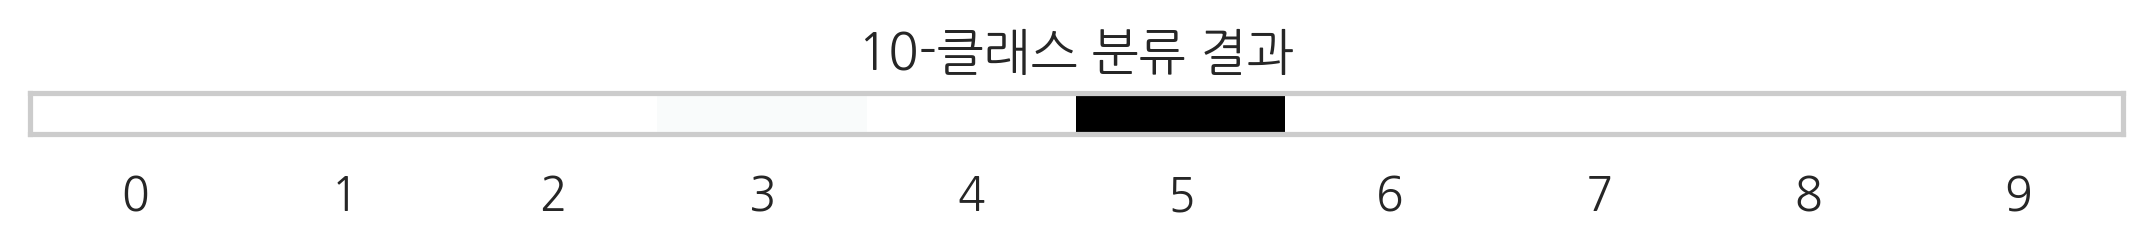

In [20]:
f20 = K.function([model2.input], [model2.layers[0].output])
f21 = K.function([model2.input], [model2.layers[1].output])
f22 = K.function([model2.input], [model2.layers[2].output])
f23 = K.function([model2.input], [model2.layers[3].output])
f24 = K.function([model2.input], [model2.layers[4].output])
f25 = K.function([model2.input], [model2.layers[5].output])

def visualize2(n):
    x = X_train[n:n + 1]
    plt.figure(figsize=(8, 3))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        if i == 1:
            plt.imshow(x[0, :, :, 0], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
        else:
            plt.imshow(np.zeros_like(x[0, :, :, 0]), cmap=mpl.cm.bone_r)
            plt.axis("off")
    plt.tight_layout()
    plt.suptitle("입력 이미지", y=1)
    
    z0 = f20([x])[0]
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(z0[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title("{}번 필터 통과 후".format(i))
    plt.tight_layout()
    plt.suptitle("1차 컨벌루션 필터 통과 후", y=1.1)
    
    z1 = f21([x])[0]
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(z1[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title("{}번 맥스풀링 통과 후".format(i))
    plt.tight_layout()
    plt.suptitle("1차 맥스풀링 통과 후", y=1.1)
        
    z2 = f22([x])[0]
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(z2[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title("{}번 필터 통과 후".format(i))
    plt.tight_layout()
    plt.suptitle("2차 컨벌루션 필터 통과 후", y=1.1)
    
    z3 = f23([x])[0]
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(z3[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title("{}번 맥스풀링 통과 후".format(i))
    plt.tight_layout()
    plt.suptitle("2차 맥스풀링 통과 후", y=1.1)
        
    z4 = f24([x])[0]
    plt.figure(figsize=(9, 2))
    plt.imshow(z4, aspect=2, cmap=mpl.cm.bone_r)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.title("벡터화")
    
    z5 = f25([x])[0]
    plt.figure(figsize=(9, 1))
    plt.imshow(z5, aspect=0.2, cmap=mpl.cm.bone_r)
    plt.xticks(range(10)); plt.yticks([]); plt.grid(False)
    plt.title("10-클래스 분류 결과")

visualize2(0)

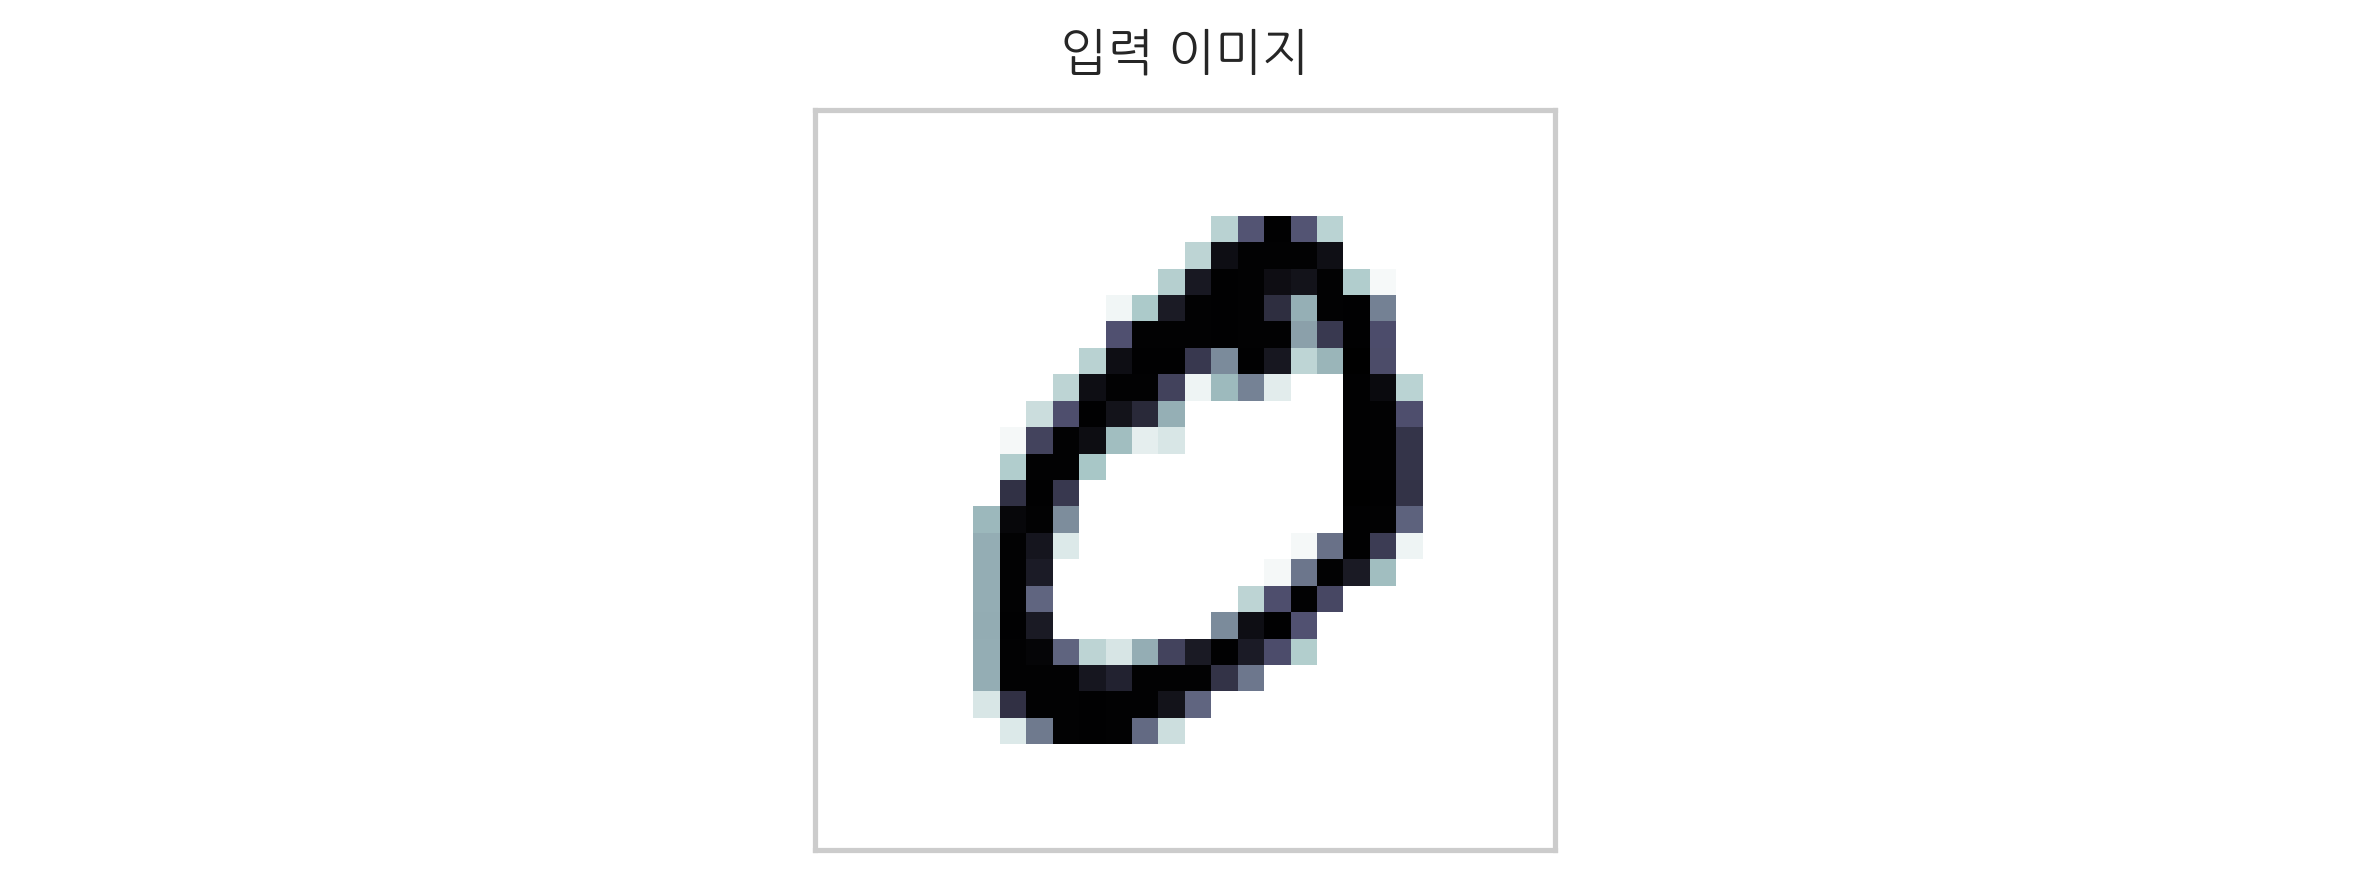

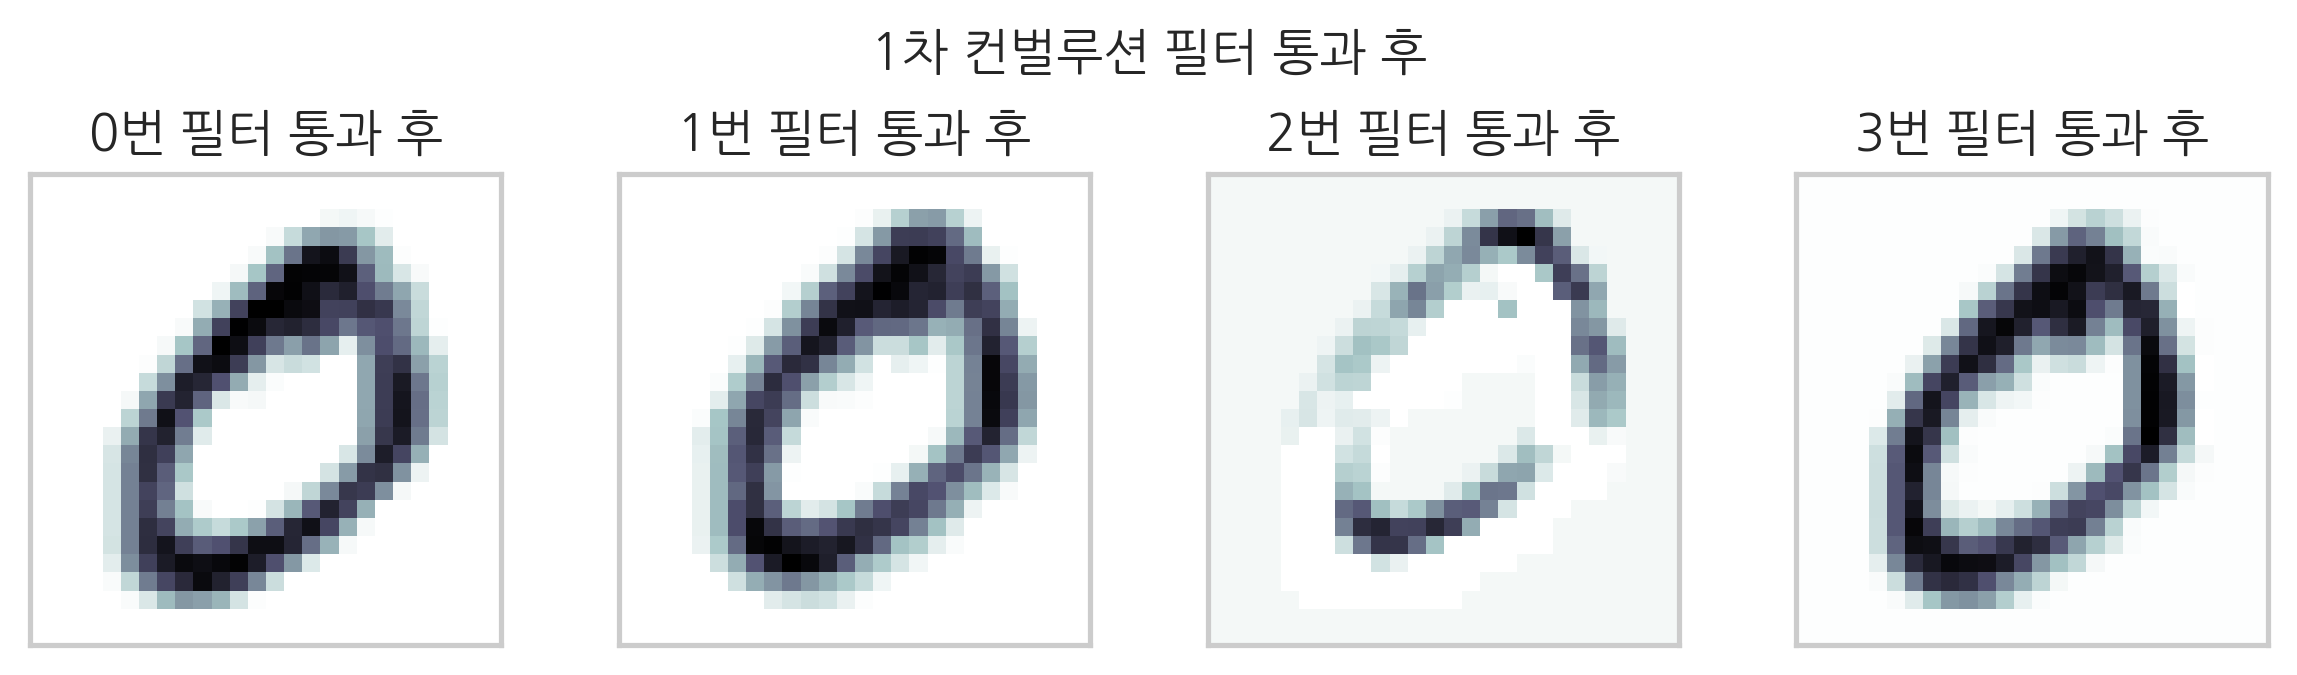

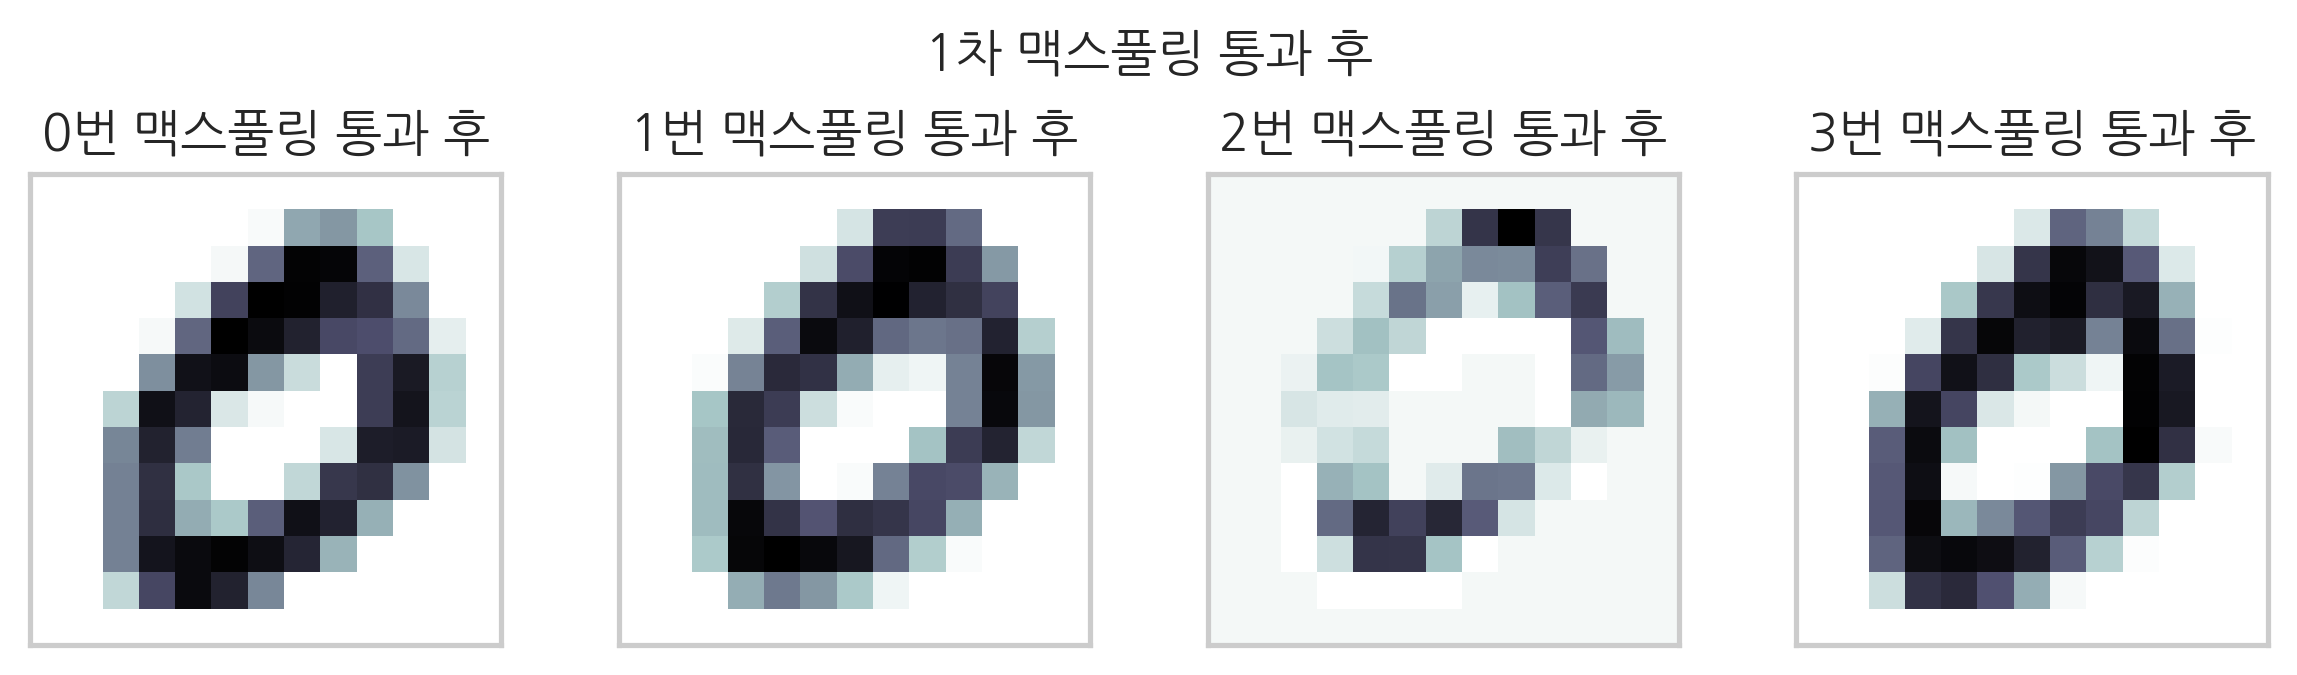

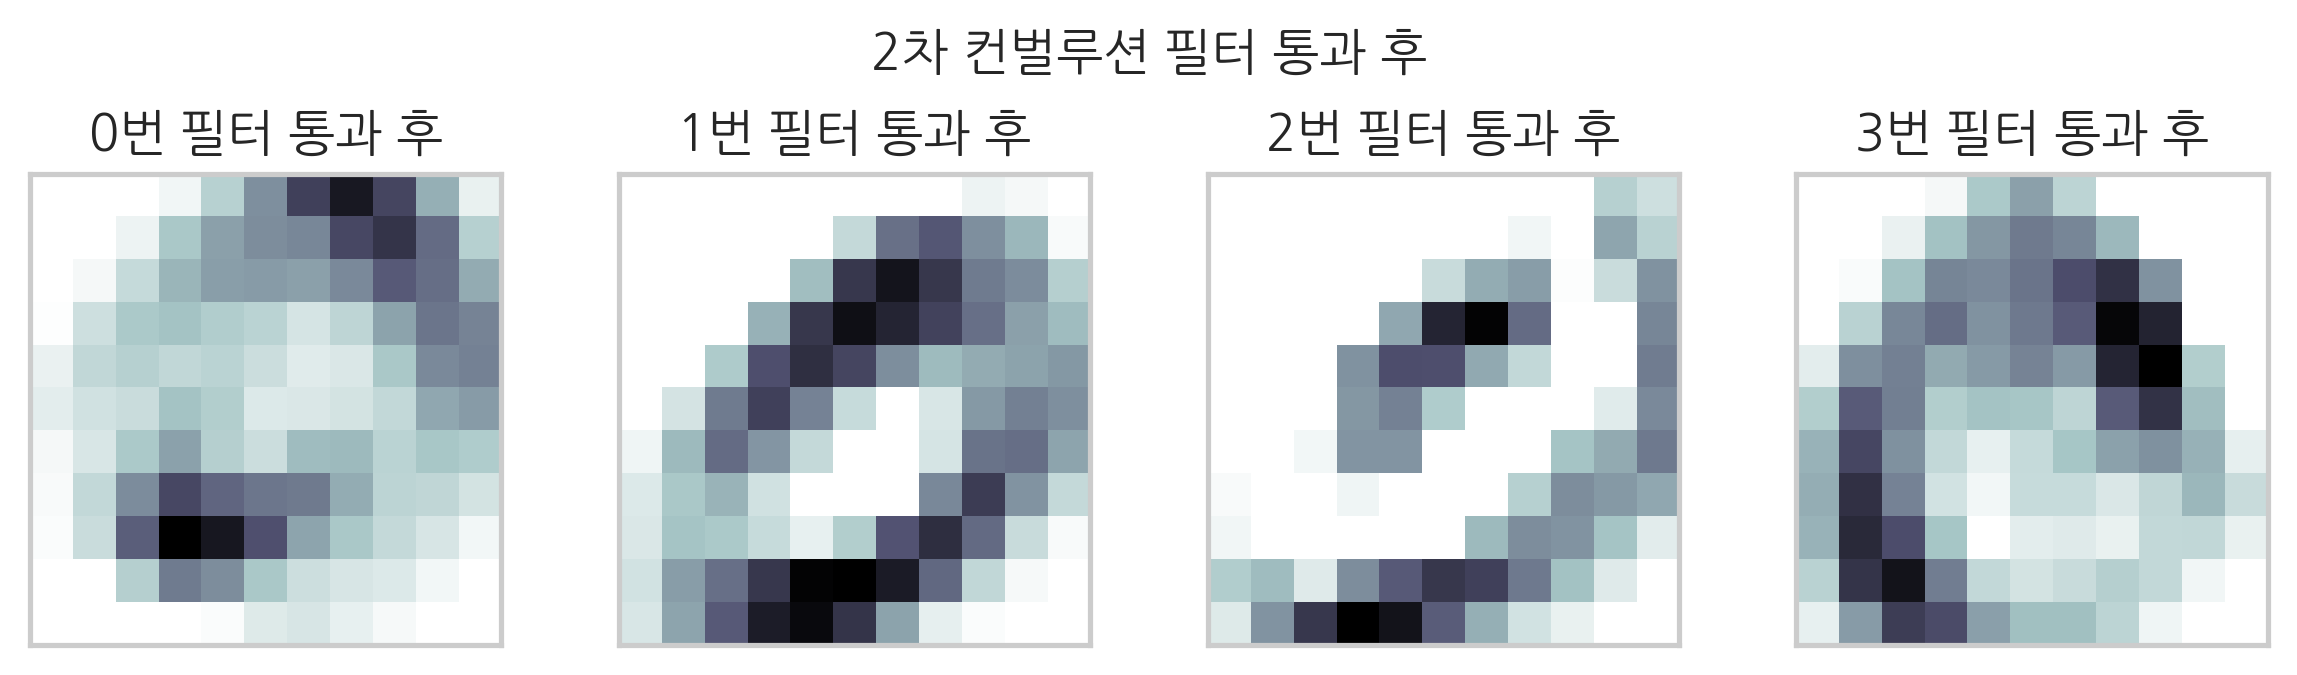

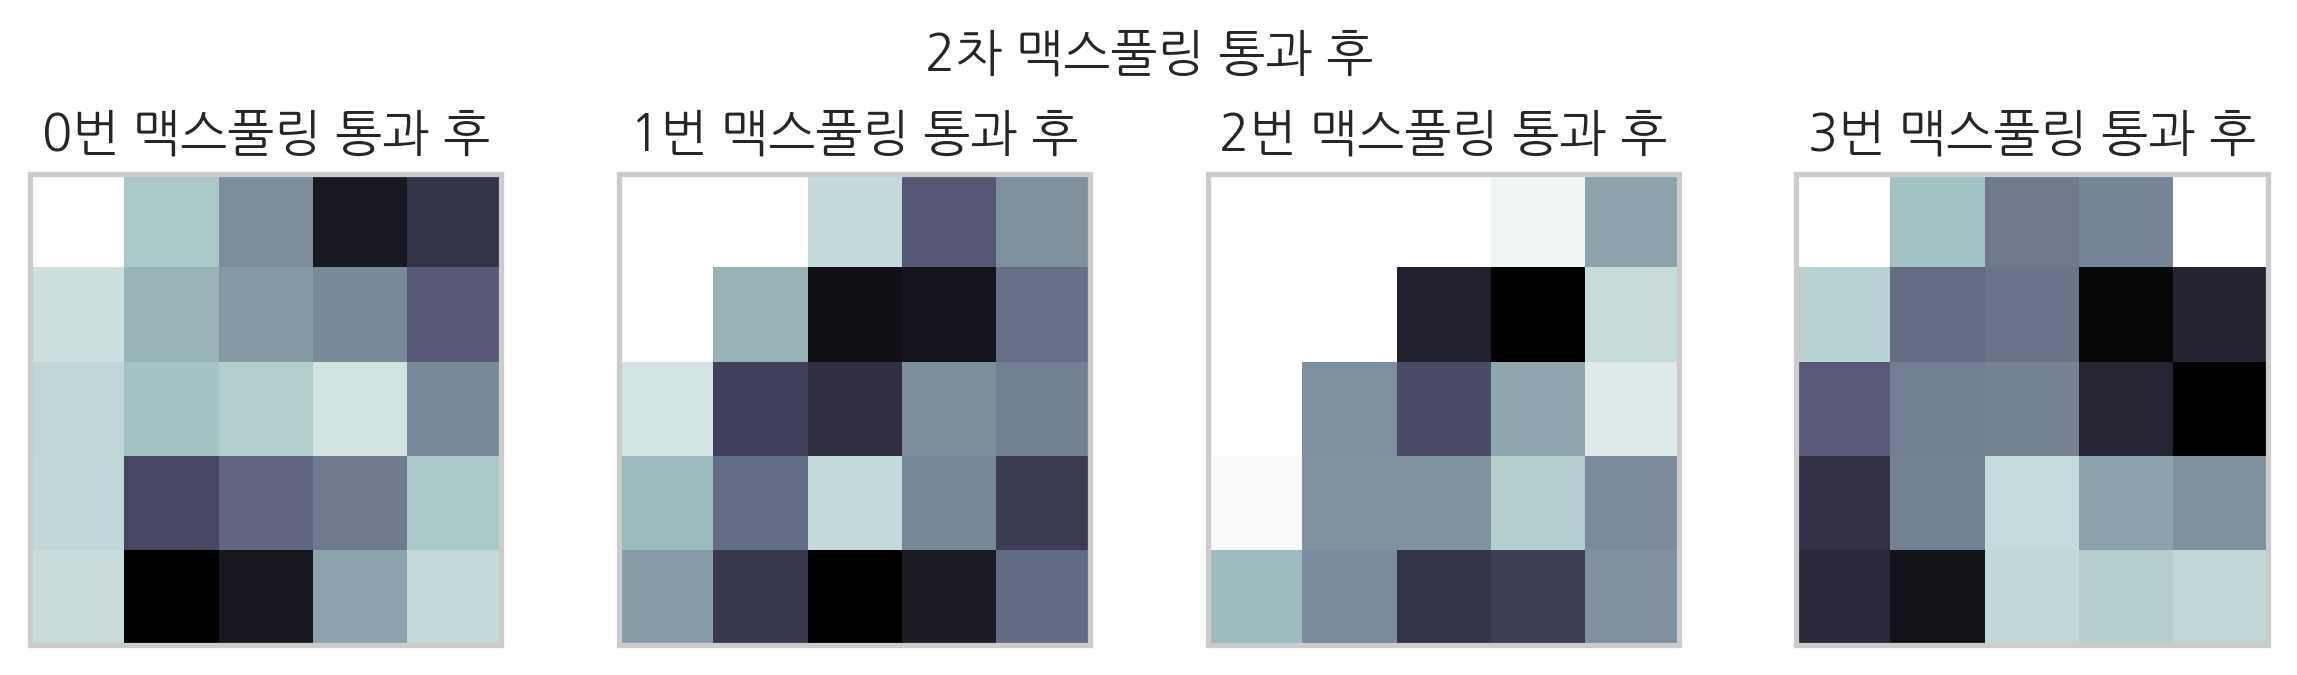

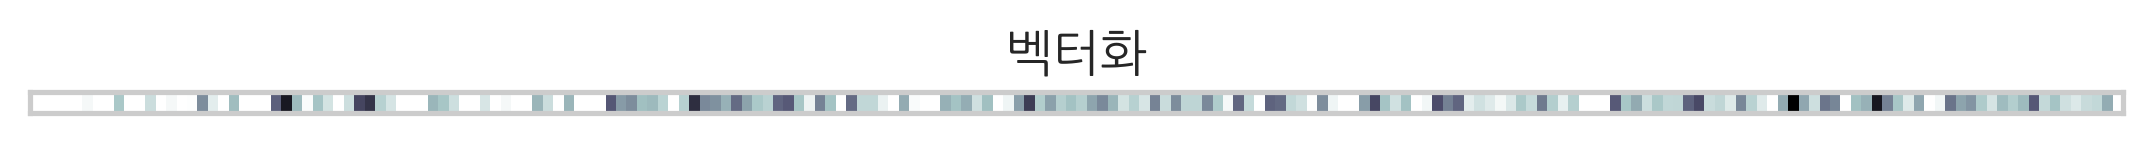

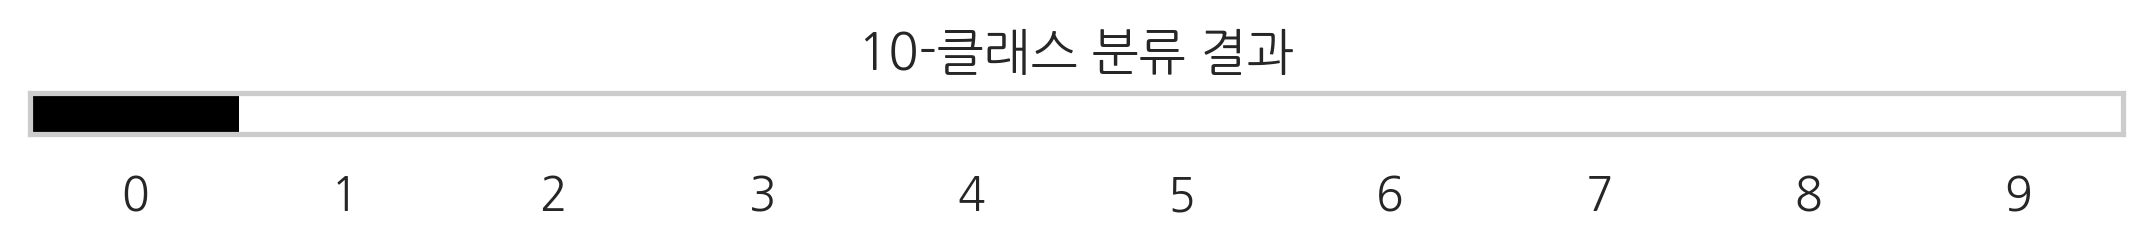

In [21]:
visualize2(1)

### 다층 CNN 예제

다음 웹사이트에서는 다층 레이어 구조의 CNN을 사용하여 CIFAR10 문제를 푸는 예제를 보이고 있다.

* http://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html